In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### Read The Data

In [3]:
df = pd.read_csv('Traffic Volume.csv')

In [4]:
df.head()

,Date_Time,Holiday,Temp,Rain_1H,Snow_1H,Clouds_All,Weather_Main,Weather_Description,Traffic_Volume
0,02-10-2012 09:00,No,288.28,0,0,40,Clouds,Scattered Clouds,5545
1,02-10-2012 10:00,No,289.36,0,0,75,Clouds,Broken Clouds,4516
2,02-10-2012 11:00,No,289.58,0,0,90,Clouds,Overcast Clouds,4767
3,02-10-2012 12:00,No,290.13,0,0,90,Clouds,Overcast Clouds,5026
4,02-10-2012 13:00,No,291.14,0,0,75,Clouds,Broken Clouds,4918


In [5]:
df.tail()

,Date_Time,Holiday,Temp,Rain_1H,Snow_1H,Clouds_All,Weather_Main,Weather_Description,Traffic_Volume
48199,30-09-2018 19:00,No,283.45,0,0,75,Clouds,Broken Clouds,3543
48200,30-09-2018 20:00,No,282.76,0,0,90,Clouds,Overcast Clouds,2781
48201,30-09-2018 21:00,No,282.73,0,0,90,Thunderstorm,Proximity Thunderstorm,2159
48202,30-09-2018 22:00,No,282.09,0,0,90,Clouds,Overcast Clouds,1450
48203,30-09-2018 23:00,No,282.12,0,0,90,Clouds,Overcast Clouds,954


#### EDA

In [6]:
df.columns

Index(['Date_Time', 'Holiday', 'Temp', 'Rain_1H', 'Snow_1H', 'Clouds_All',
       'Weather_Main', 'Weather_Description', 'Traffic_Volume'],
      dtype='object')

In [7]:
df.shape

(48204, 9)

In [8]:
df.duplicated().value_counts()

False    48187
True        17
Name: count, dtype: int64

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().value_counts()

False    48187
Name: count, dtype: int64

In [11]:
df.isnull().sum()

Date_Time              0
Holiday                0
Temp                   0
Rain_1H                0
Snow_1H                0
Clouds_All             0
Weather_Main           0
Weather_Description    0
Traffic_Volume         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48187 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Time            48187 non-null  object 
 1   Holiday              48187 non-null  object 
 2   Temp                 48187 non-null  float64
 3   Rain_1H              48187 non-null  int64  
 4   Snow_1H              48187 non-null  int64  
 5   Clouds_All           48187 non-null  int64  
 6   Weather_Main         48187 non-null  object 
 7   Weather_Description  48187 non-null  object 
 8   Traffic_Volume       48187 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 3.7+ MB


In [13]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format='%d-%m-%Y %H:%M')

In [14]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date_Time,48187,2016-01-05 06:49:48.133729024,2012-10-02 09:00:00,2014-02-06 07:30:00,2016-06-10 21:00:00,2017-08-11 05:30:00,2018-09-30 23:00:00,NaN
Temp,48187.0,281.204995,0.0,272.16,282.45,291.806,310.07,13.338738
Rain_1H,48187.0,0.331998,0.0,0.0,0.0,0.0,9831.0,44.795794
Snow_1H,48187.0,0.000125,0.0,0.0,0.0,0.0,1.0,0.011158
Clouds_All,48187.0,49.365451,0.0,1.0,64.0,90.0,100.0,39.015213
Traffic_Volume,48187.0,3259.618134,0.0,1192.5,3379.0,4933.0,7280.0,1986.954465


In [15]:
df.nunique()

Date_Time              40575
Holiday                   12
Temp                    5843
Rain_1H                   30
Snow_1H                    2
Clouds_All                60
Weather_Main              11
Weather_Description       37
Traffic_Volume          6704
dtype: int64

In [16]:
df.shape

(48187, 9)

In [17]:
df['Weather_Main'].value_counts()

Weather_Main
Clouds          15158
Clear           13384
Mist             5949
Rain             5672
Snow             2875
Drizzle          1820
Haze             1360
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64

In [18]:
df['Temp']=df['Temp']-273

Temperature from  Kelvin to Celcius.

#### Data Visualization

In [19]:
numerical_features = []
categorical_features = []

for col in df.columns:
    if col == 'Date_Time':
        continue
    
    if pd.api.types.is_numeric_dtype(df[col]):
        numerical_features.append(col)
    else:
        categorical_features.append(col)

In [20]:
print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['Temp', 'Rain_1H', 'Snow_1H', 'Clouds_All', 'Traffic_Volume']
Categorical Features : ['Holiday', 'Weather_Main', 'Weather_Description']


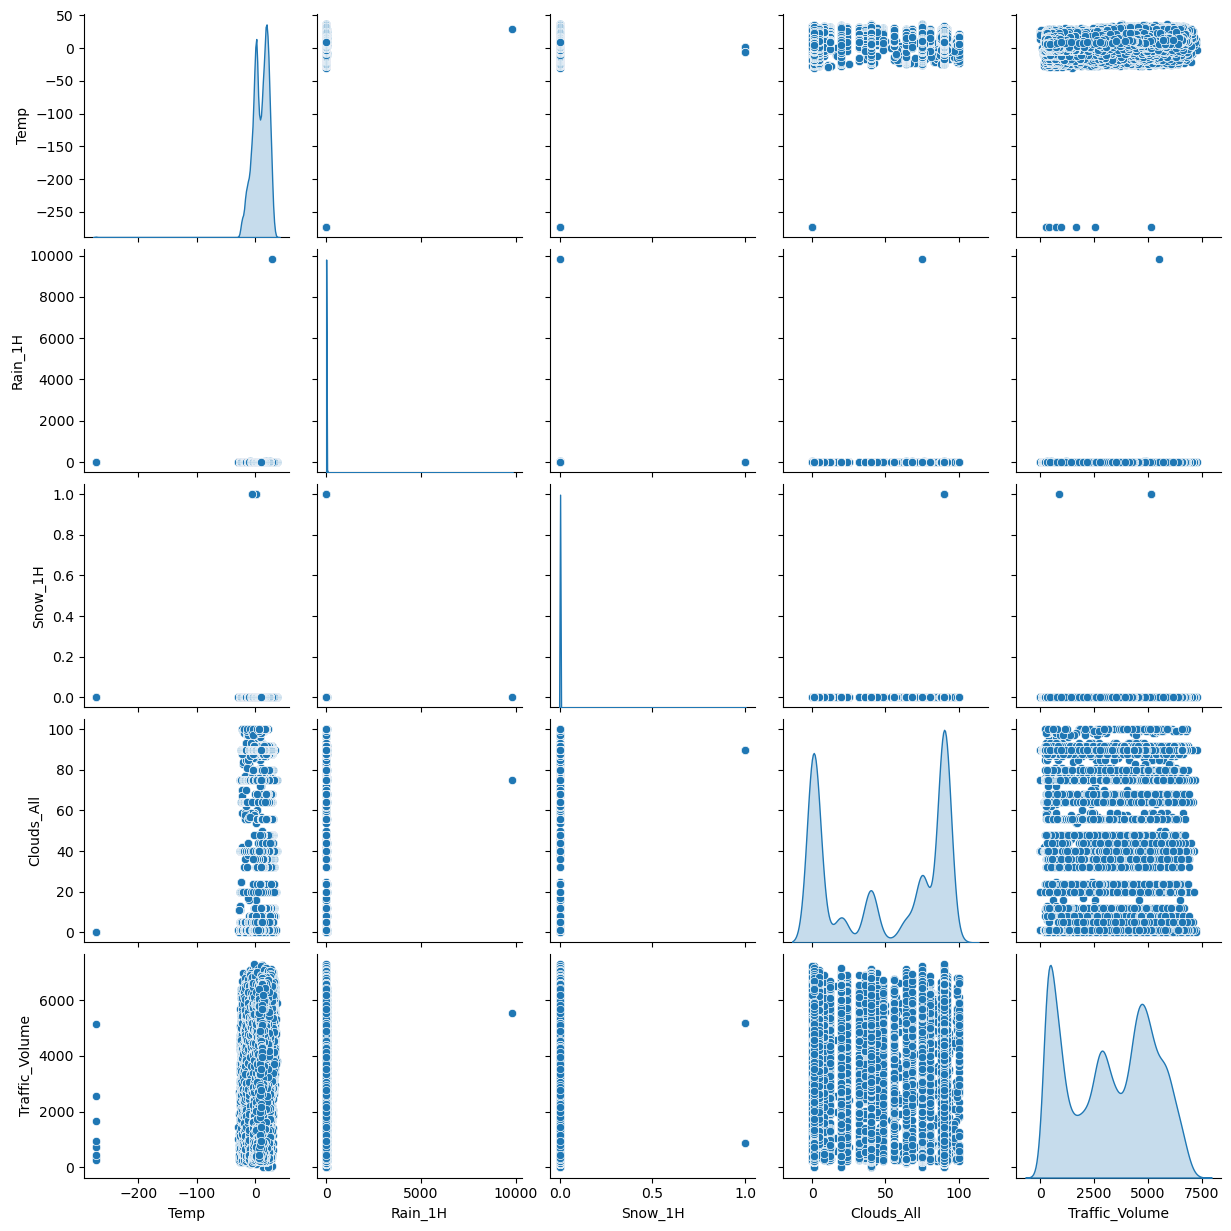

In [21]:
numerical_features = ['Temp', 'Rain_1H', 'Snow_1H', 'Clouds_All', 'Traffic_Volume']
numerical_features_df = df[numerical_features]

sns.pairplot(numerical_features_df, diag_kind='kde')
plt.show()

In [22]:
if 'Traffic_Volume' in numerical_features:
    numerical_features.remove('Traffic_Volume')

In [23]:
print(f'Numerical Features : {numerical_features}')

Numerical Features : ['Temp', 'Rain_1H', 'Snow_1H', 'Clouds_All']


#### Univariate Analysis

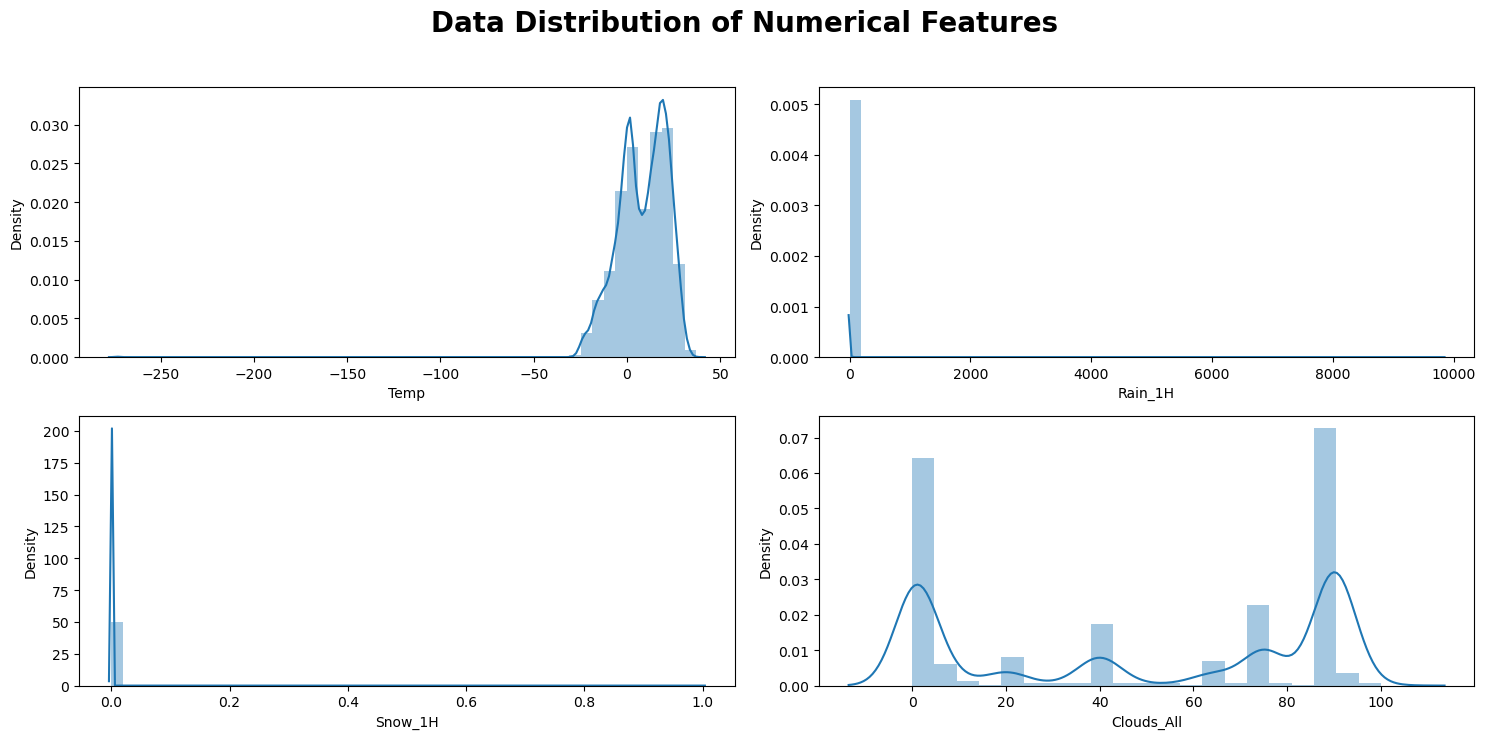

In [24]:
plt.figure(figsize=(15, 10))
plt.suptitle('Data Distribution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(3,2, i+1)
    sns.distplot(df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

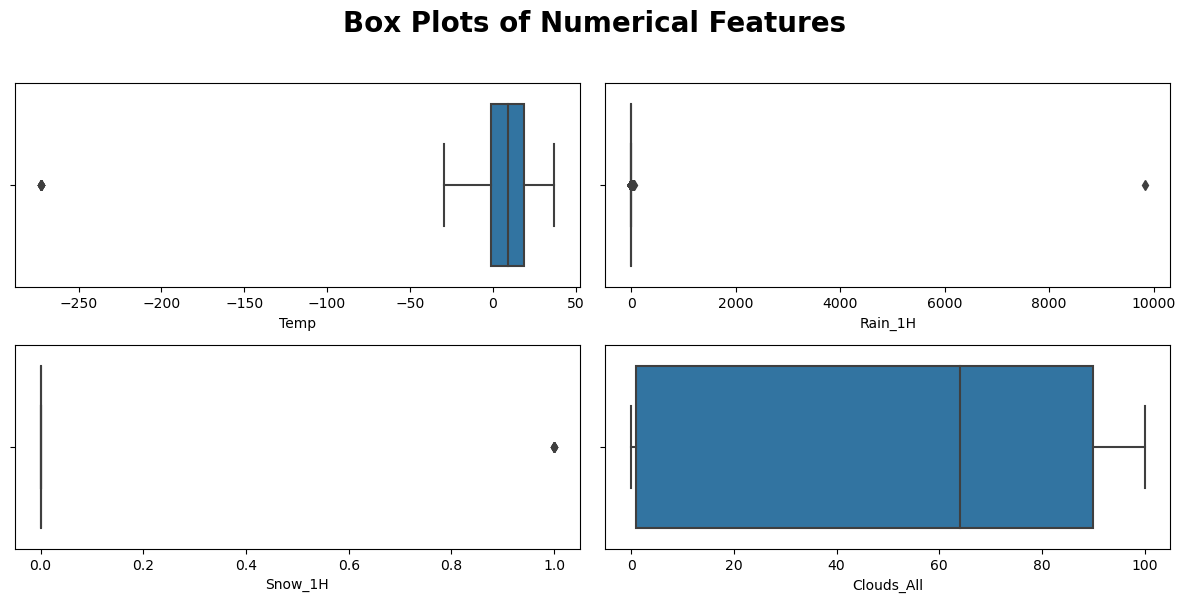

In [25]:
plt.figure(figsize=(12, 8))
plt.suptitle('Box Plots of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

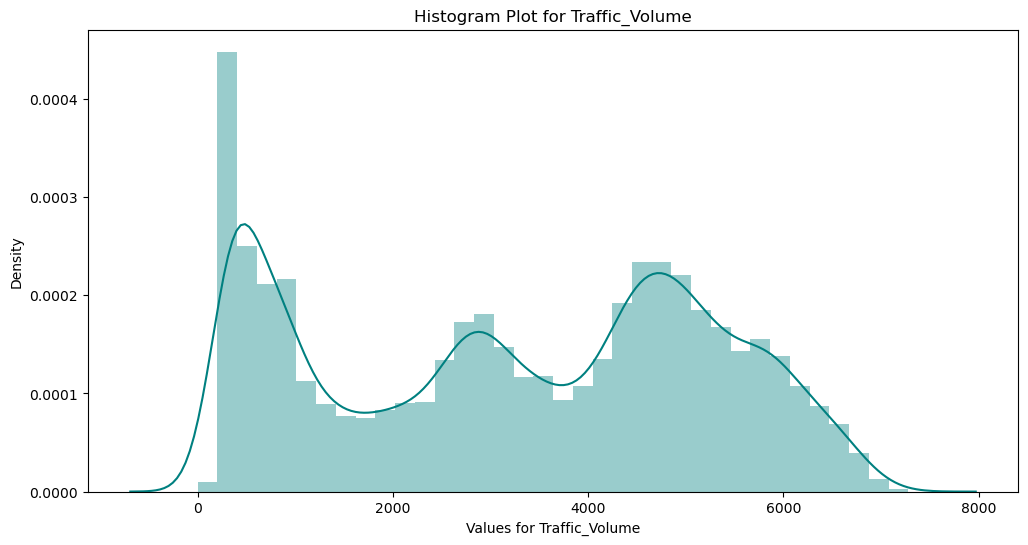

In [26]:
plt.figure(figsize=(12,6))
sns.distplot(df['Traffic_Volume'],color='teal')
plt.title('Histogram Plot for Traffic_Volume')
plt.xlabel('Values for Traffic_Volume')
plt.show() 

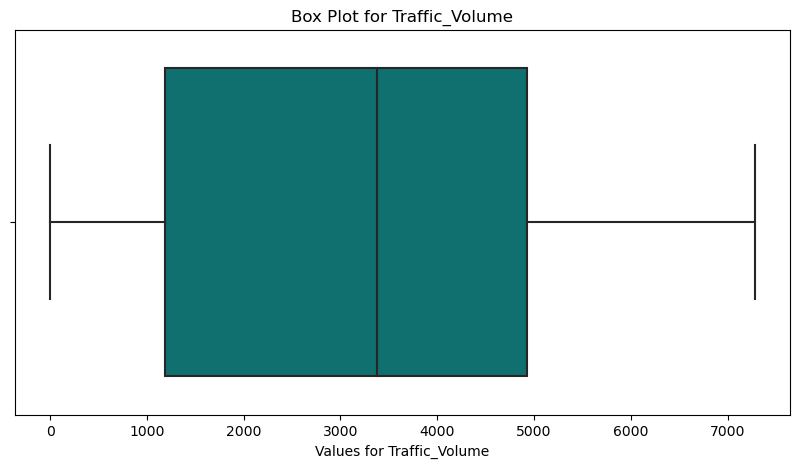

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Traffic_Volume',data=df,color='teal')
plt.title('Box Plot for Traffic_Volume')
plt.xlabel('Values for Traffic_Volume')
plt.show()

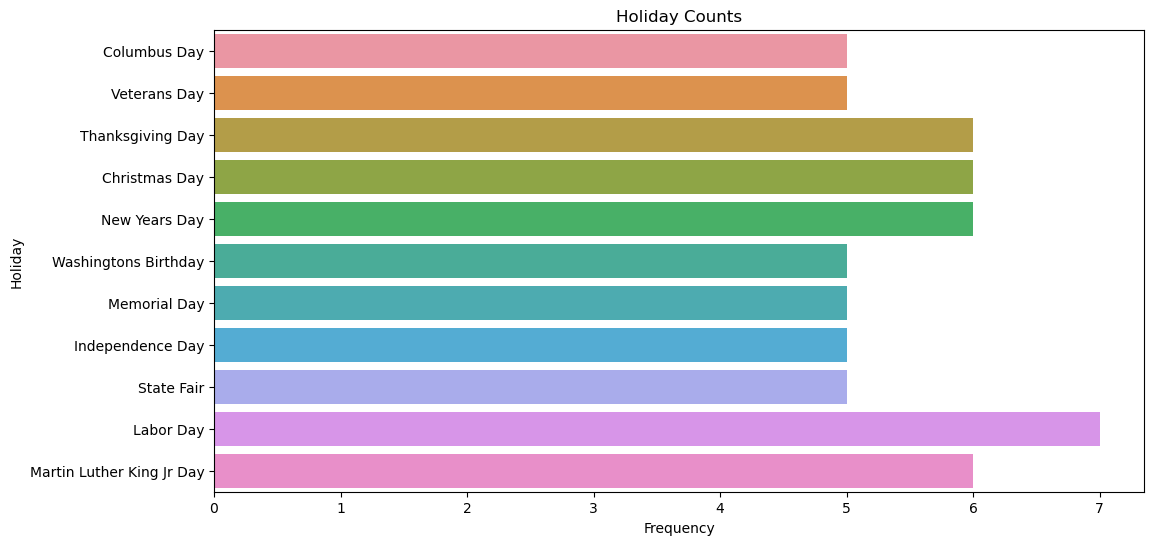

In [28]:
plt.figure(figsize=(12, 6))
plt.title('Holiday Counts')
sns.countplot(y='Holiday', data=df[df['Holiday'] != 'No'])
plt.xlabel('Frequency')
plt.show()

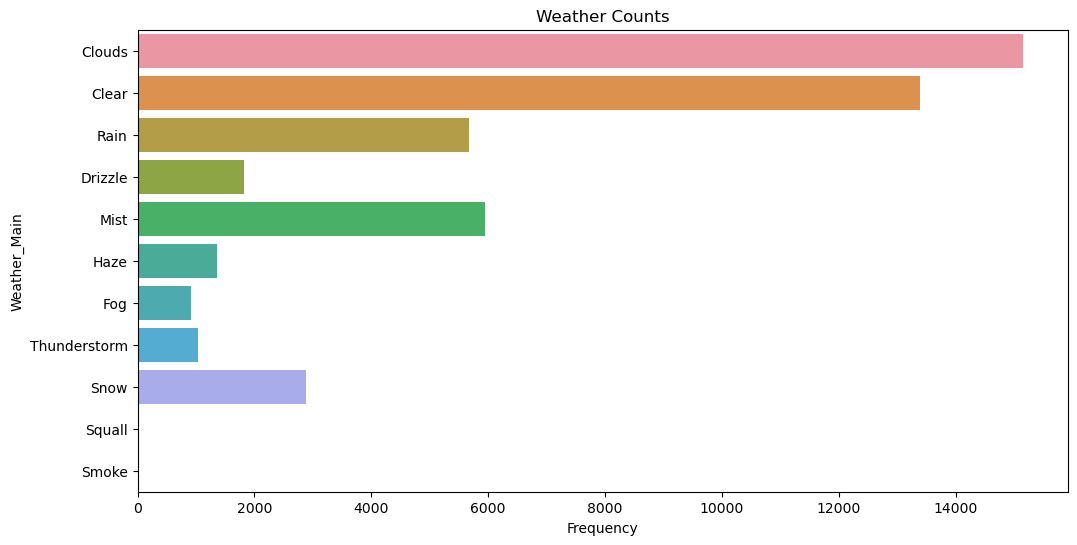

In [29]:
plt.figure(figsize=(12, 6))
plt.title('Weather Counts')
sns.countplot(y='Weather_Main', data=df)
plt.xlabel('Frequency')
plt.show()

Text(0.5, 0, 'Frequency')

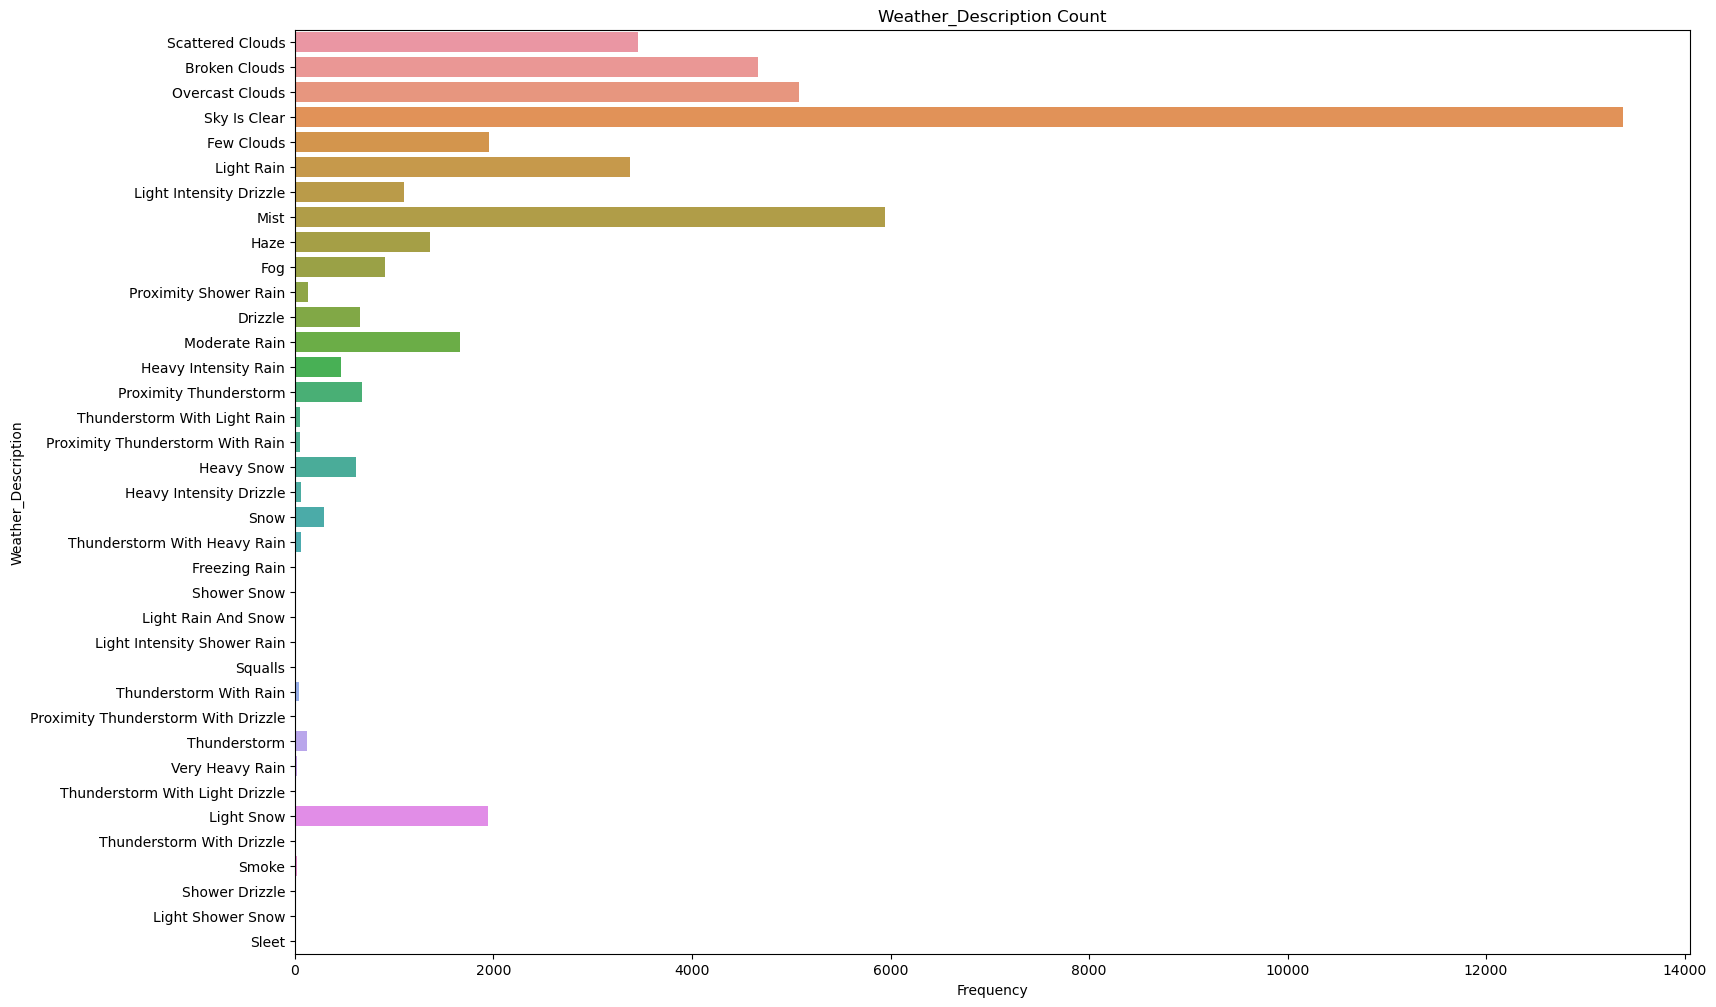

In [30]:
plt.figure(figsize=(18,12))
plt.title('Weather_Description Count')
sns.countplot(y='Weather_Description',data=df)
plt.xlabel('Frequency')

#### Bivariate Analysis

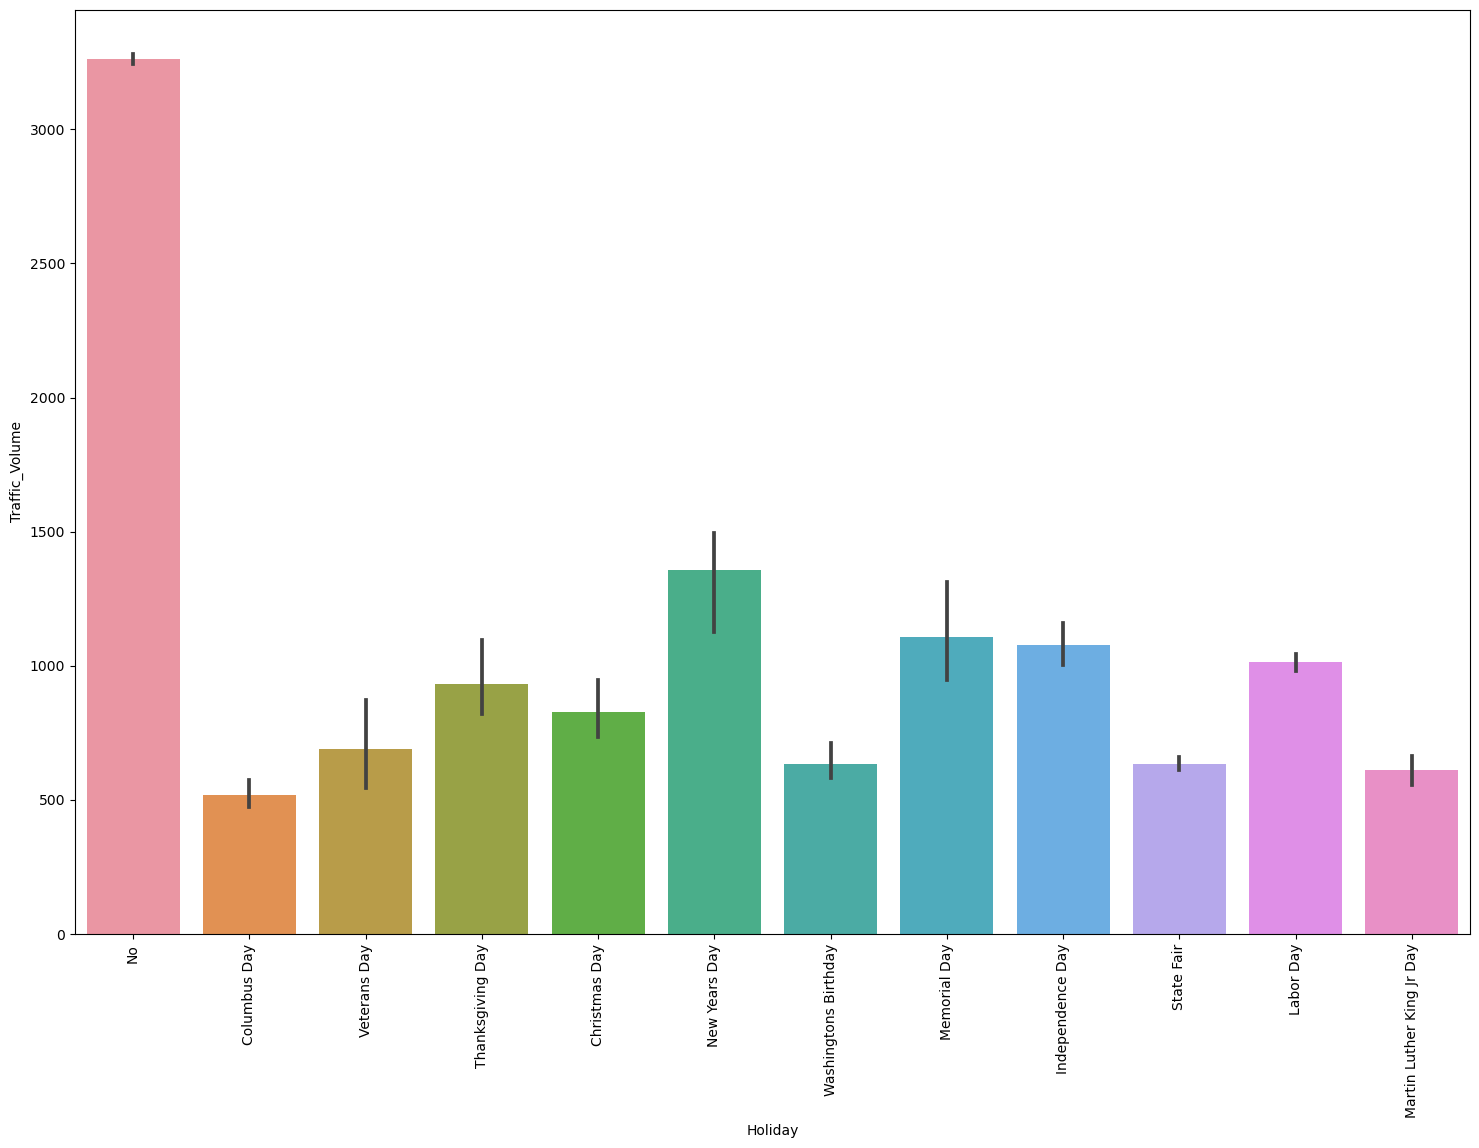

In [31]:
plt.figure(figsize=(18, 12))
sns.barplot(data=df, x='Holiday', y='Traffic_Volume')
plt.xlabel('Holiday')
plt.xticks(rotation = 90)
plt.show()

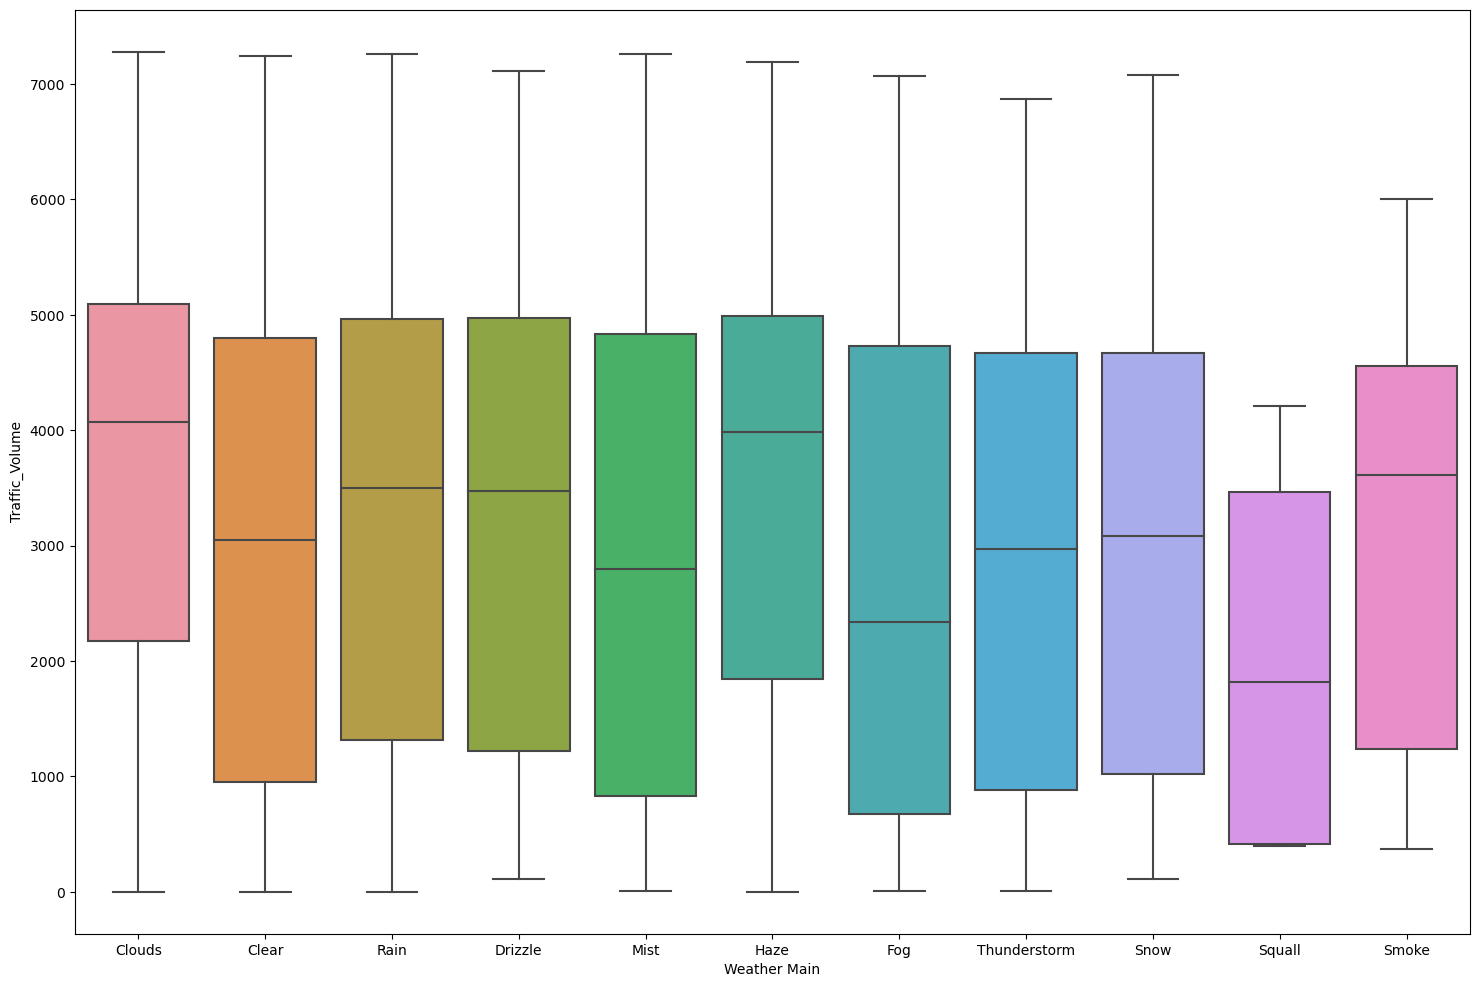

In [32]:
plt.figure(figsize=(18, 12))
sns.boxplot(data=df, x='Weather_Main', y='Traffic_Volume')
plt.xlabel('Weather Main')
plt.show()

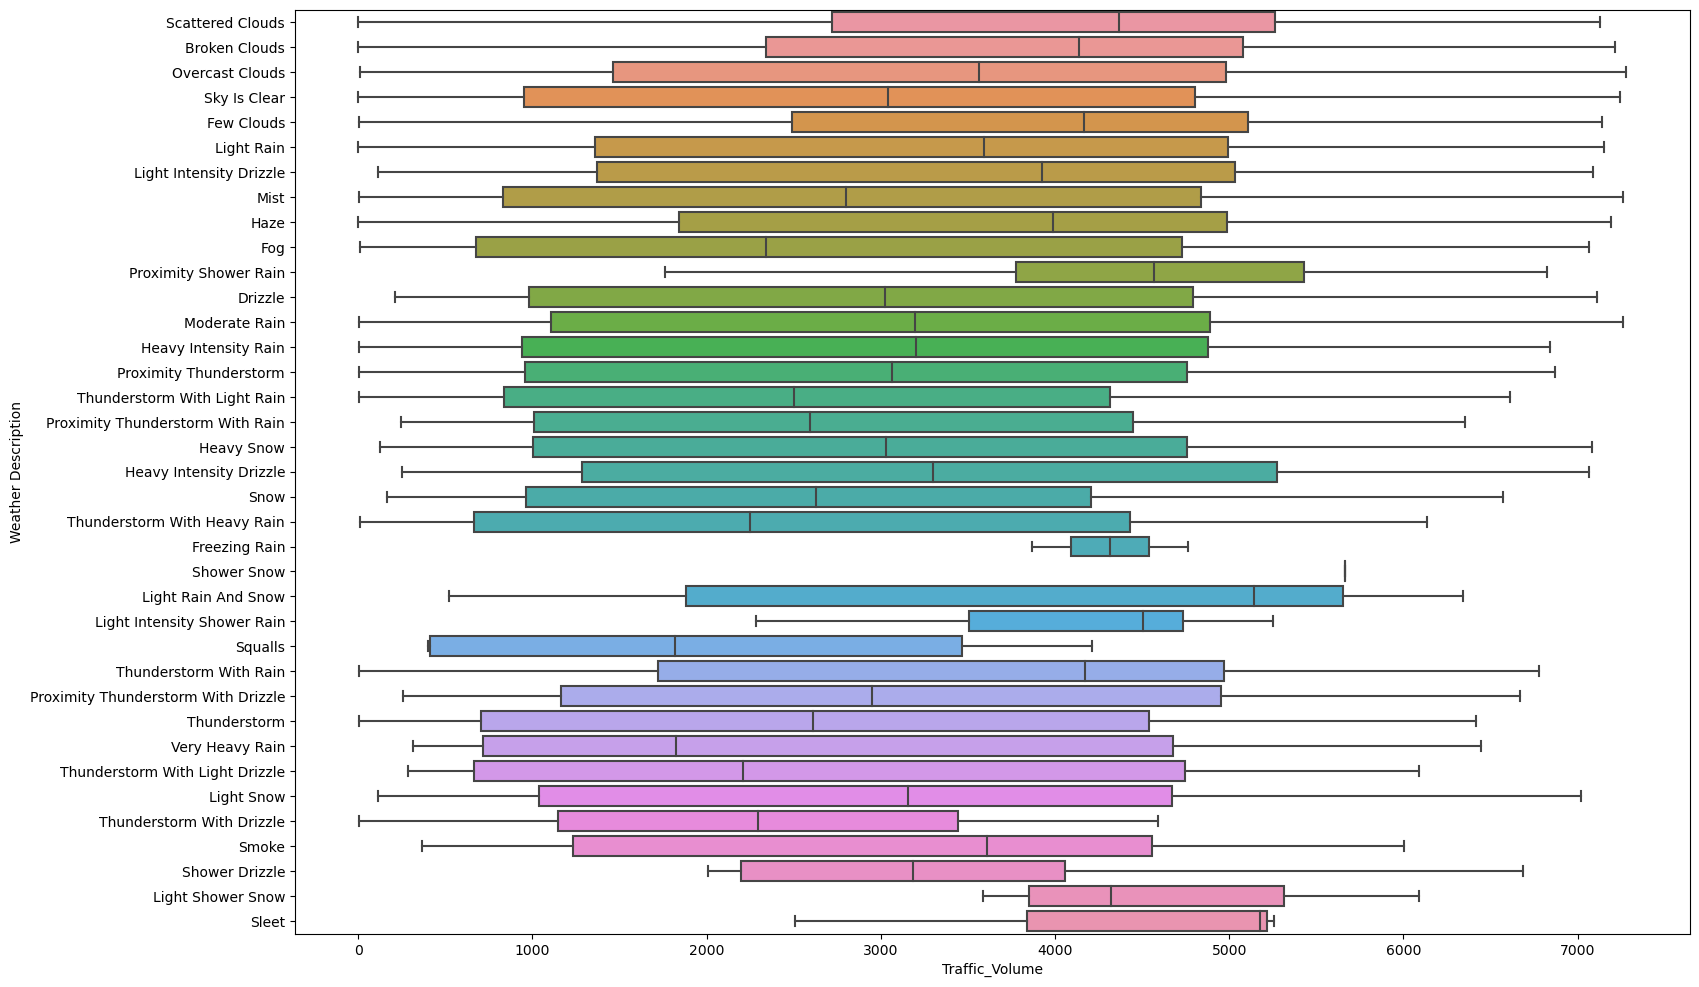

In [33]:
plt.figure(figsize=(18, 12))
sns.boxplot(data=df, y='Weather_Description', x='Traffic_Volume', orient='h')
plt.ylabel('Weather Description')
plt.show()

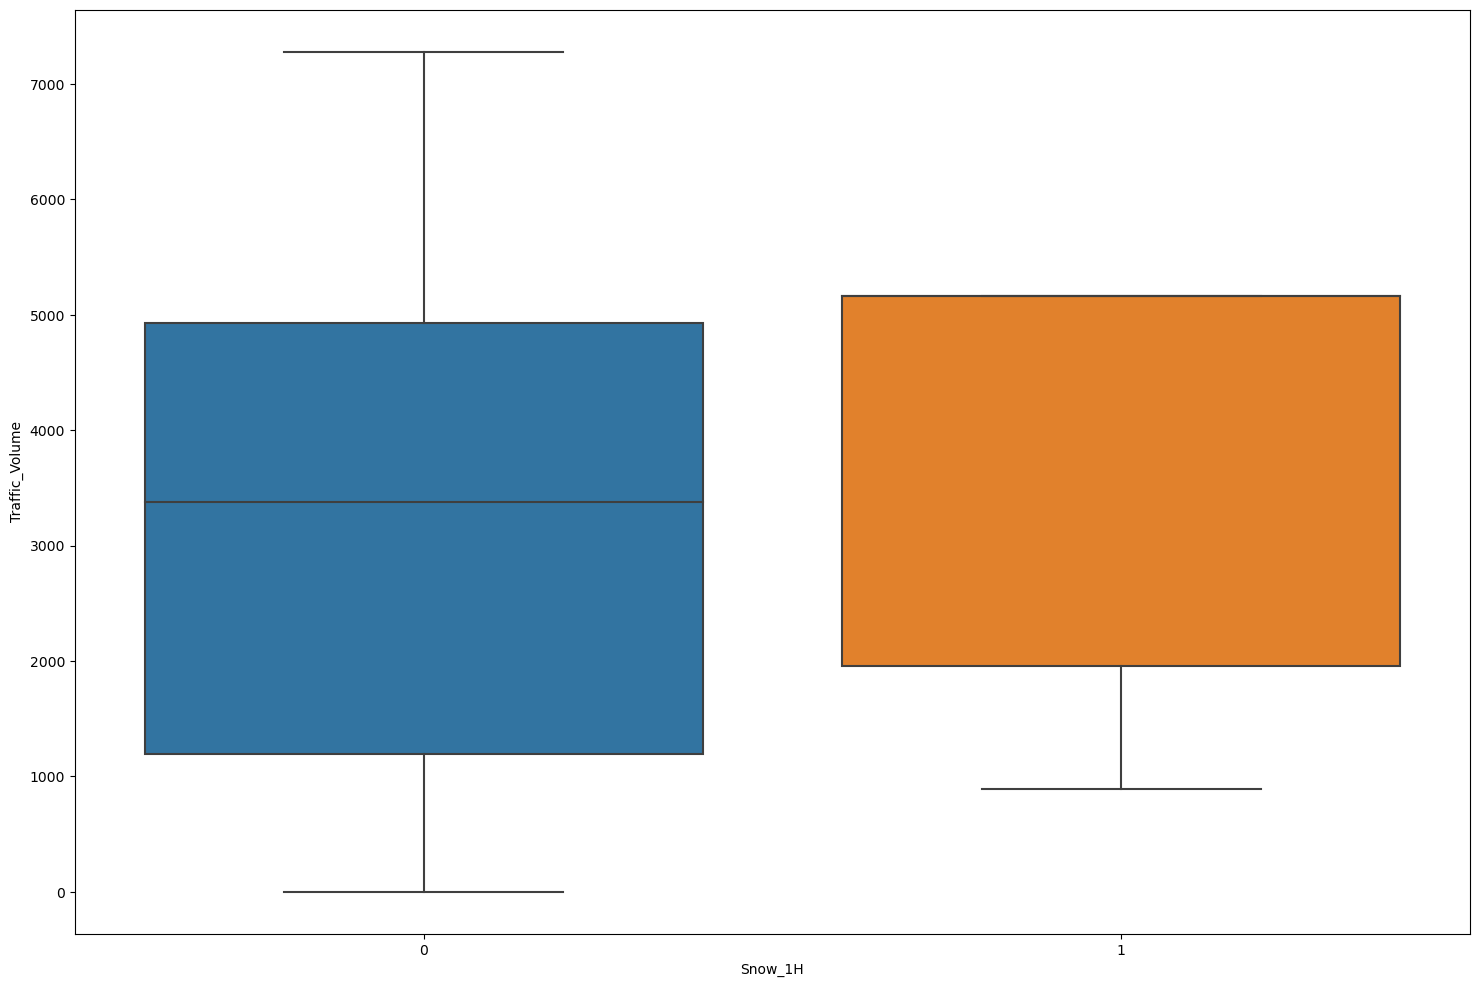

In [34]:
plt.figure(figsize=(18, 12))
sns.boxplot(data=df, x='Snow_1H', y='Traffic_Volume')
plt.xlabel('Snow_1H')
plt.show()

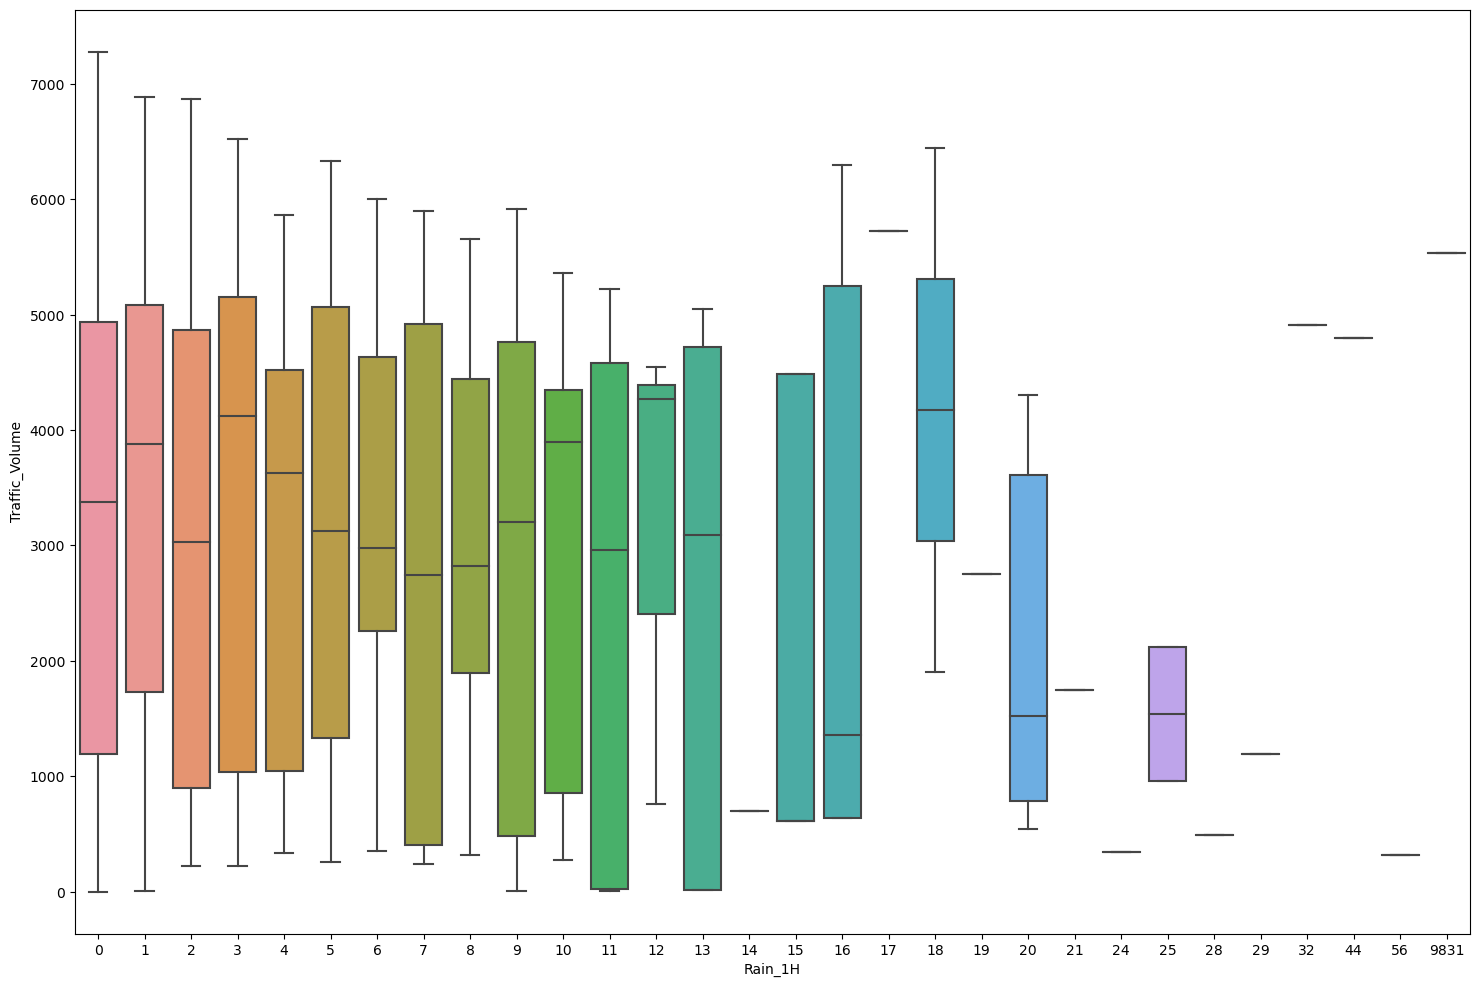

In [35]:
plt.figure(figsize=(18, 12))
sns.boxplot(data=df, x='Rain_1H', y='Traffic_Volume')
plt.xlabel('Rain_1H')
plt.show()

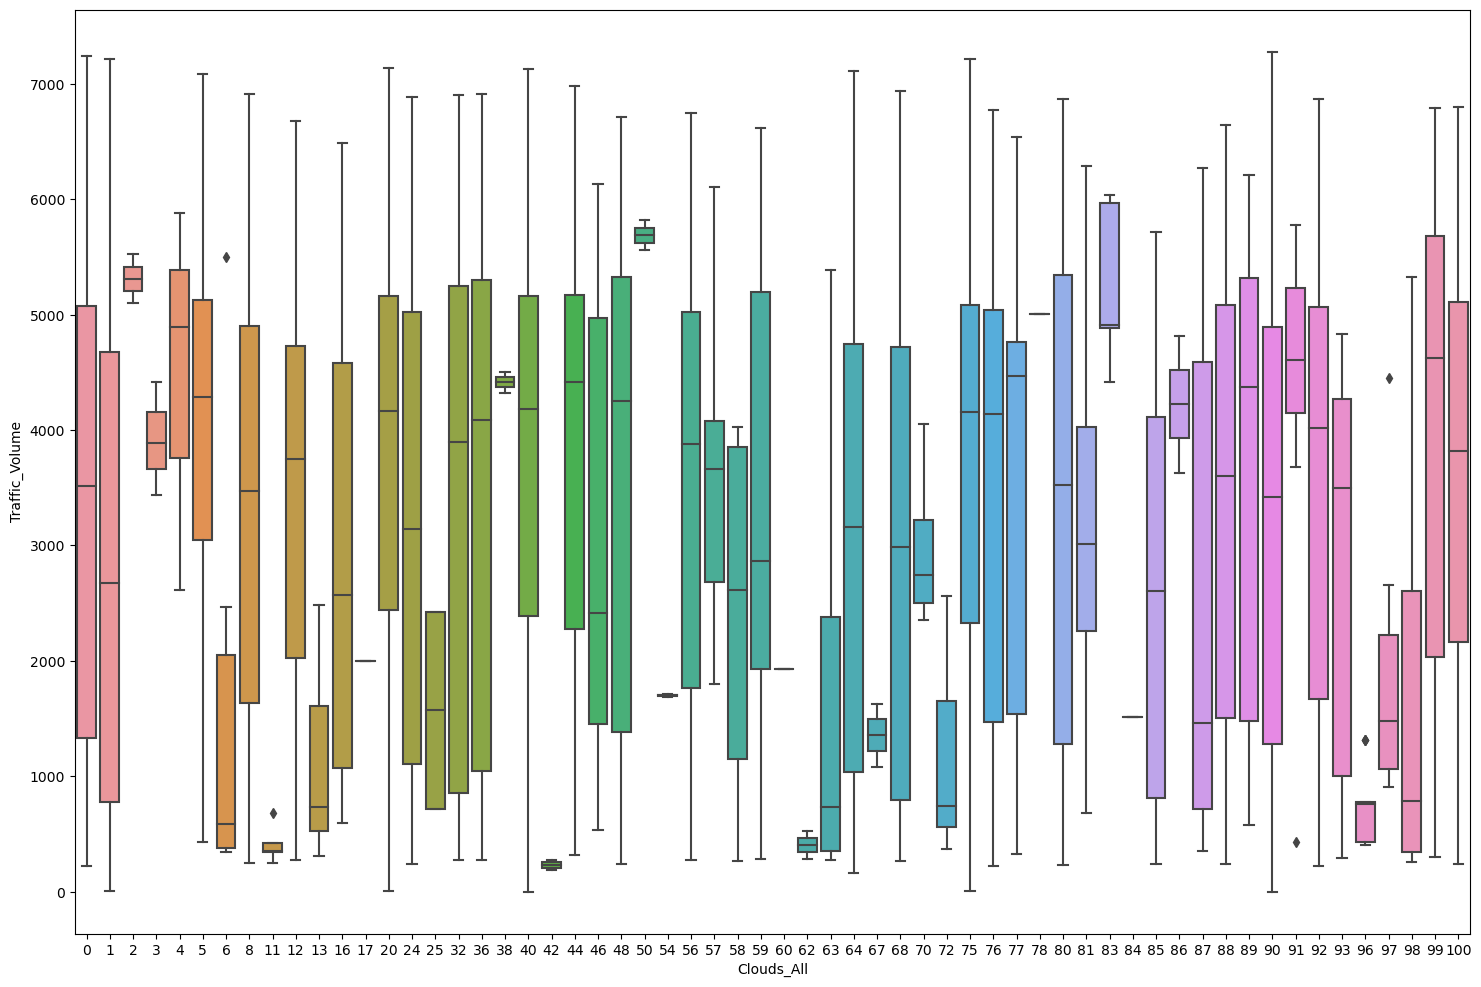

In [36]:
plt.figure(figsize=(18, 12))
sns.boxplot(data=df, x='Clouds_All', y='Traffic_Volume')
plt.xlabel('Clouds_All')
plt.show()

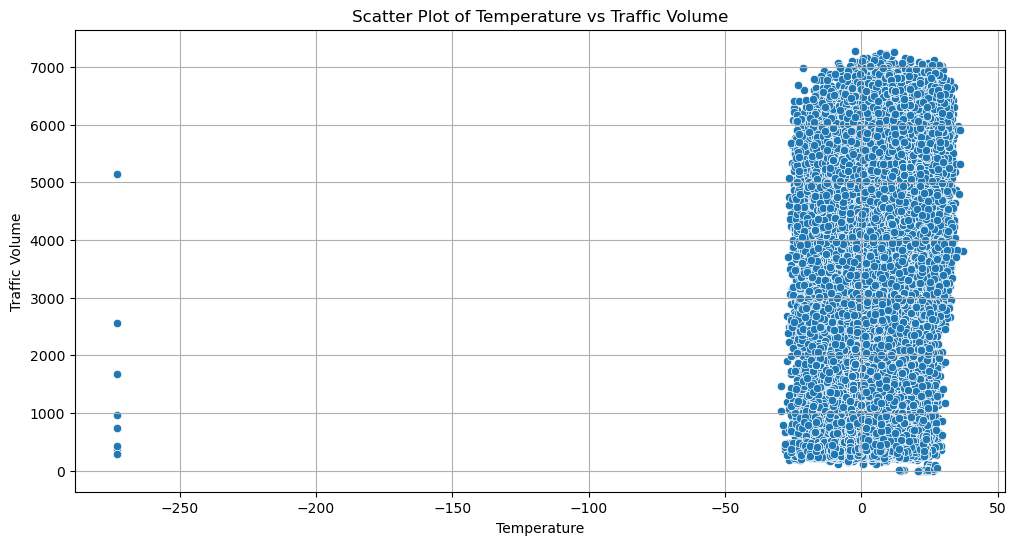

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Temp', y='Traffic_Volume')
plt.title('Scatter Plot of Temperature vs Traffic Volume')
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

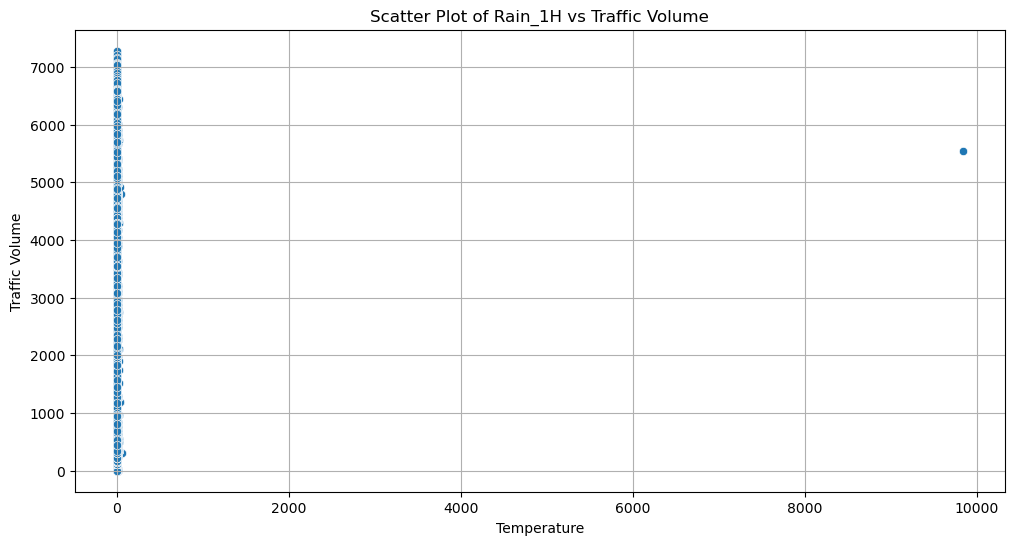

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Rain_1H', y='Traffic_Volume')
plt.title('Scatter Plot of Rain_1H vs Traffic Volume')
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

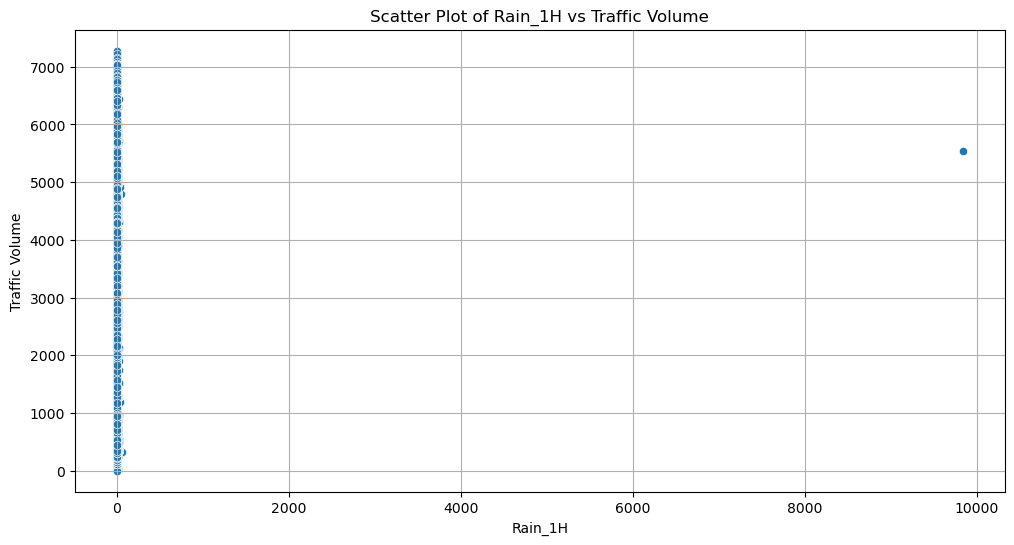

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Rain_1H', y='Traffic_Volume')
plt.title('Scatter Plot of Rain_1H vs Traffic Volume')
plt.xlabel('Rain_1H')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

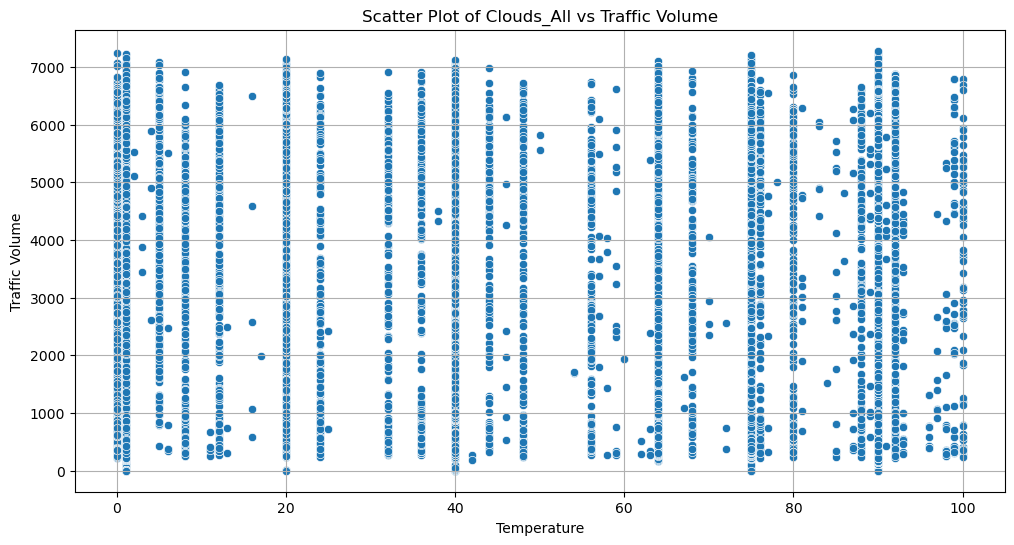

In [40]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Clouds_All', y='Traffic_Volume')
plt.title('Scatter Plot of Clouds_All vs Traffic Volume')
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

#### Feature Engineering

#### 1. Add New Features

In [41]:
df['Weekday'] = df['Date_Time'].dt.weekday
df['Hour'] = df['Date_Time'].dt.hour
df['Month'] = df['Date_Time'].dt.month
df['Year'] = df['Date_Time'].dt.year

In [42]:
df.head()

,Date_Time,Holiday,Temp,Rain_1H,Snow_1H,Clouds_All,Weather_Main,Weather_Description,Traffic_Volume,Weekday,Hour,Month,Year
0,2012-10-02 09:00:00,No,15.28,0,0,40,Clouds,Scattered Clouds,5545,1,9,10,2012
1,2012-10-02 10:00:00,No,16.36,0,0,75,Clouds,Broken Clouds,4516,1,10,10,2012
2,2012-10-02 11:00:00,No,16.58,0,0,90,Clouds,Overcast Clouds,4767,1,11,10,2012
3,2012-10-02 12:00:00,No,17.13,0,0,90,Clouds,Overcast Clouds,5026,1,12,10,2012
4,2012-10-02 13:00:00,No,18.14,0,0,75,Clouds,Broken Clouds,4918,1,13,10,2012


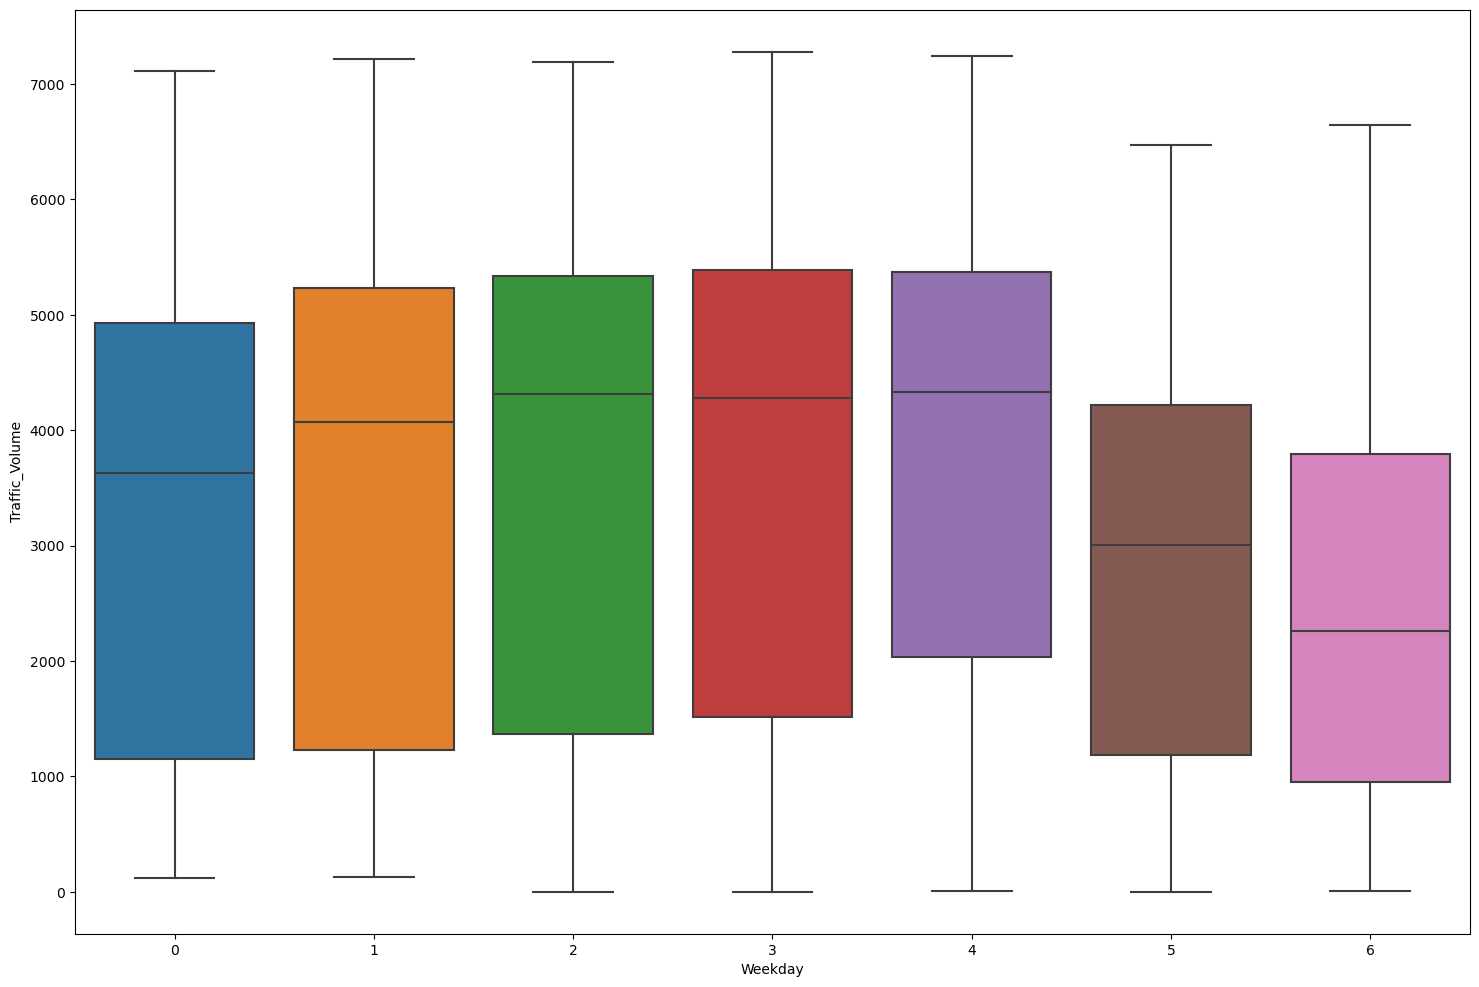

In [43]:
plt.figure(figsize=(18, 12))
sns.boxplot(data=df, x='Weekday', y='Traffic_Volume')
plt.xlabel('Weekday')
plt.show()

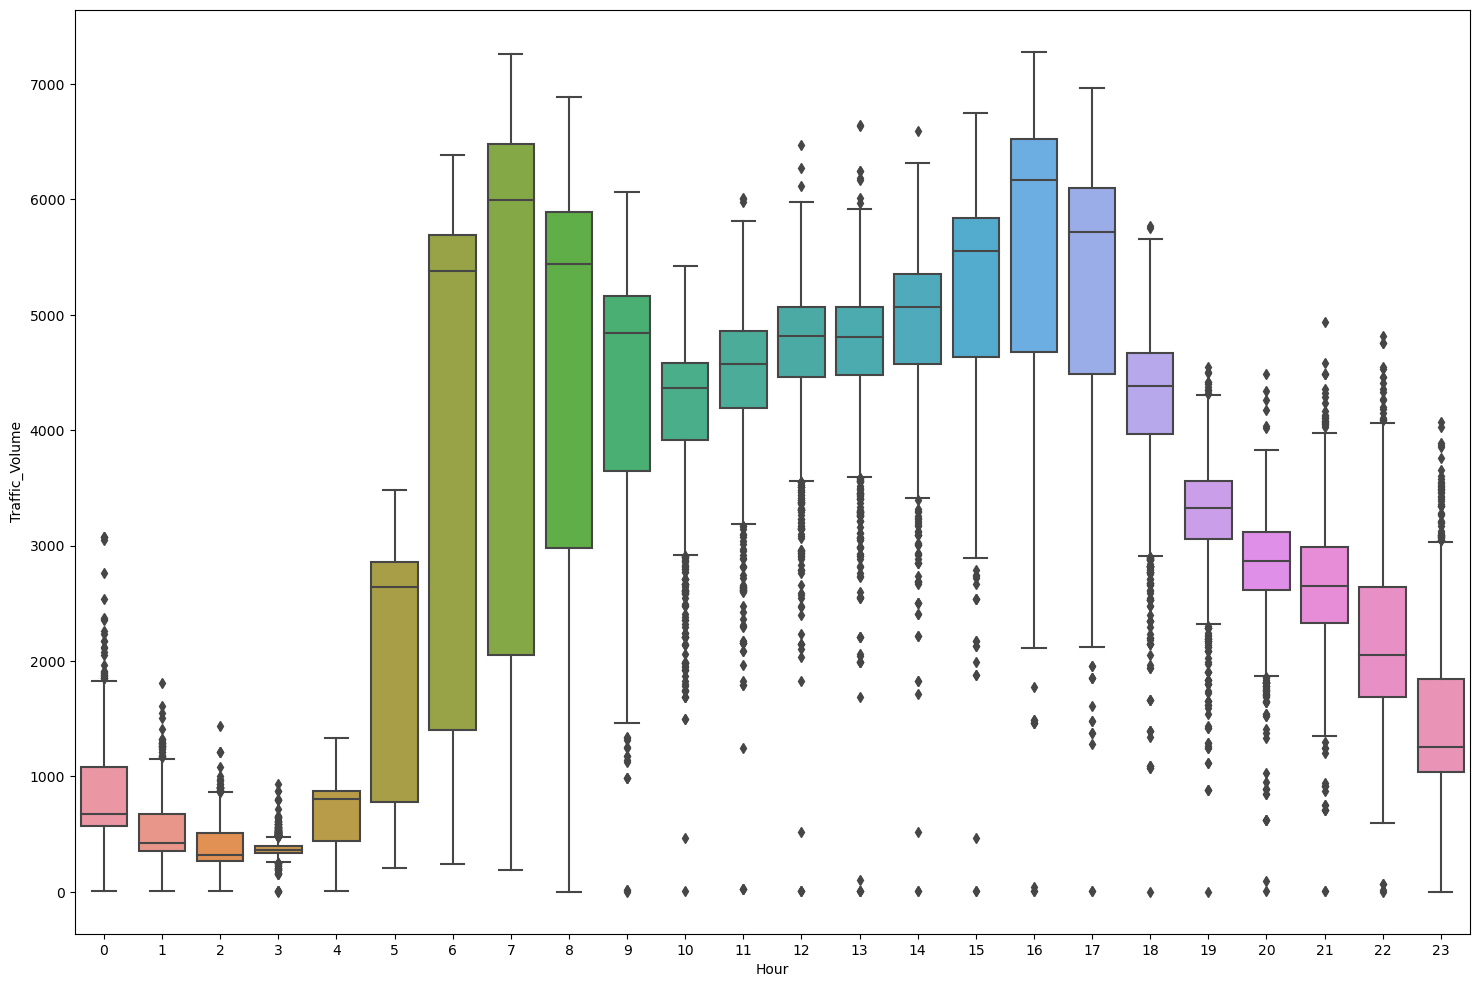

In [44]:
plt.figure(figsize=(18, 12))
sns.boxplot(data=df, x='Hour', y='Traffic_Volume')
plt.xlabel('Hour')
plt.show()

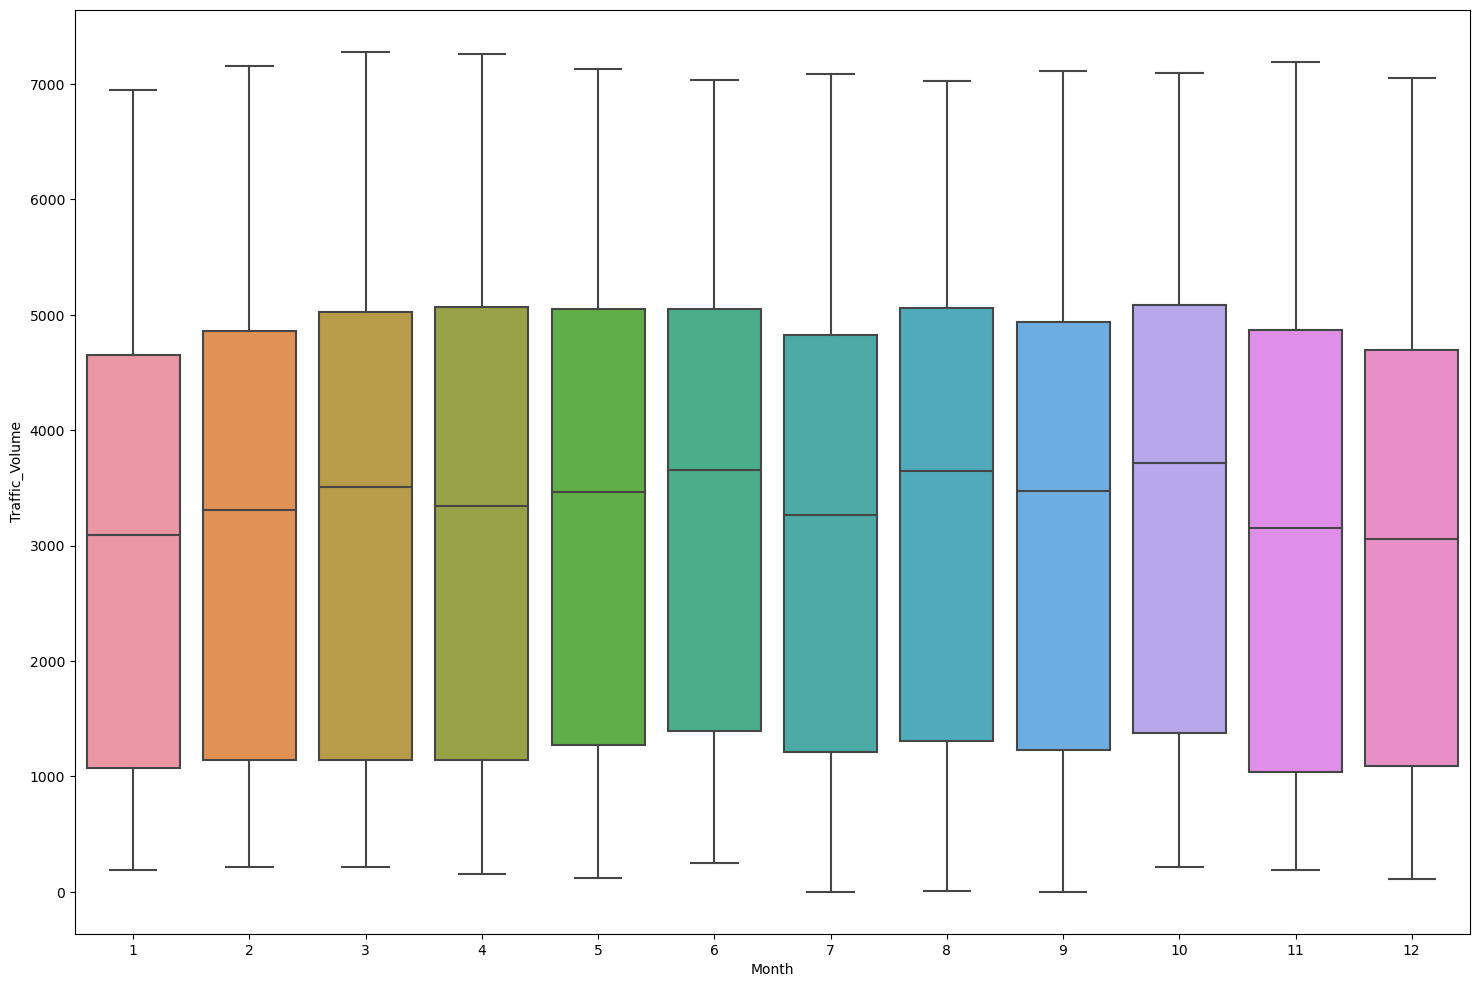

In [45]:
plt.figure(figsize=(18, 12))
sns.boxplot(data=df, x='Month', y='Traffic_Volume')
plt.xlabel('Month')
plt.show()

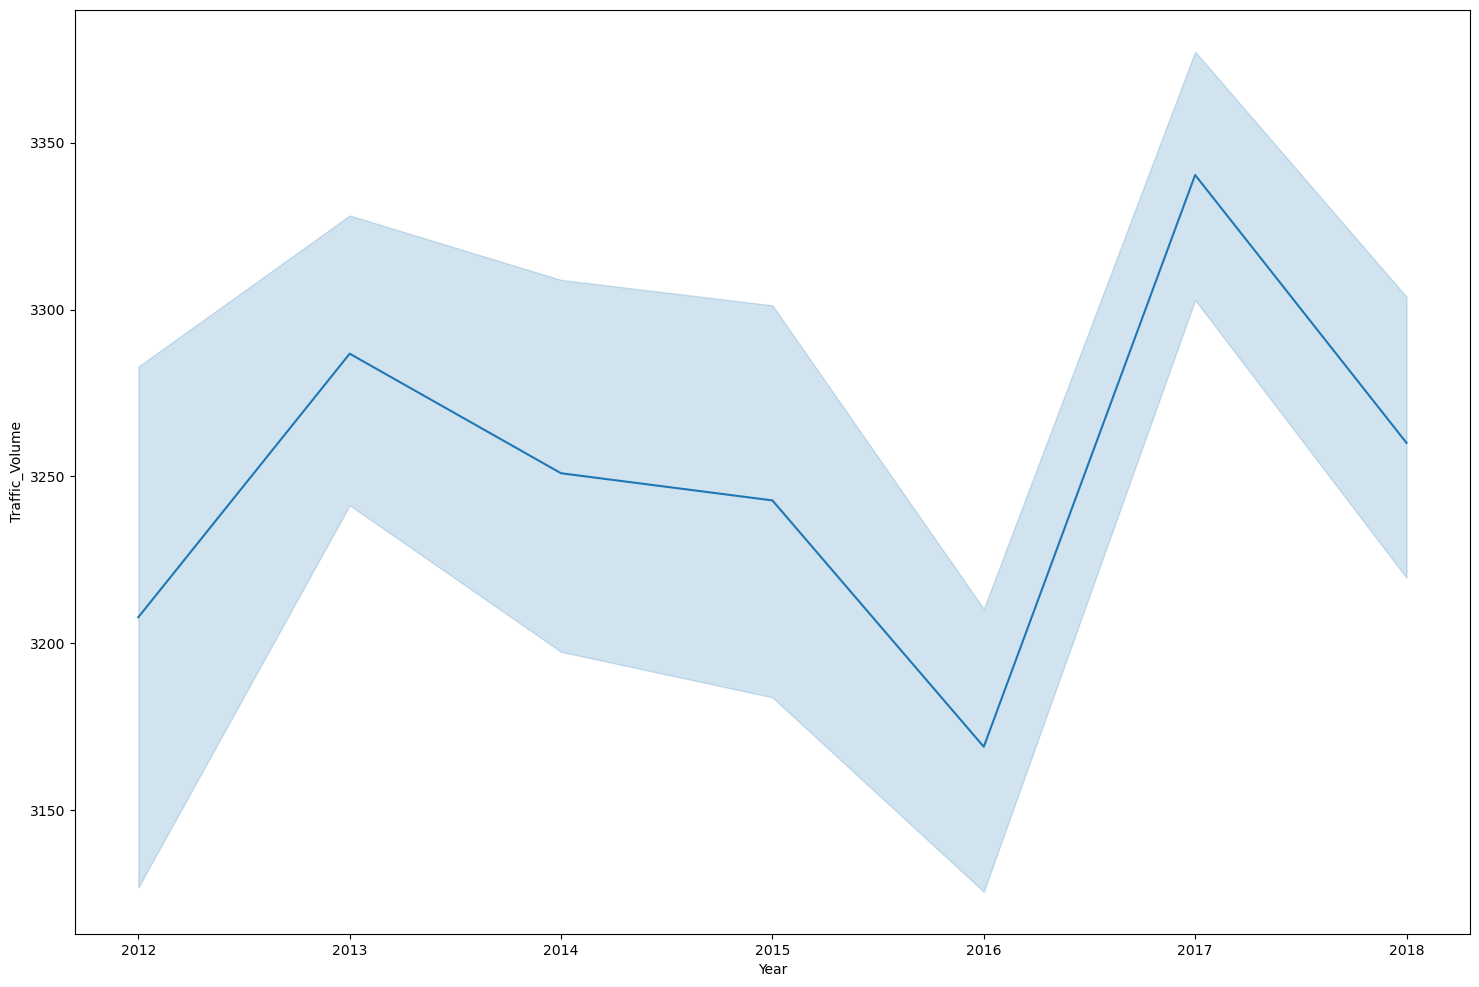

In [46]:
plt.figure(figsize=(18, 12))
sns.lineplot(data=df, x='Year', y='Traffic_Volume')
plt.xlabel('Year')
plt.show()

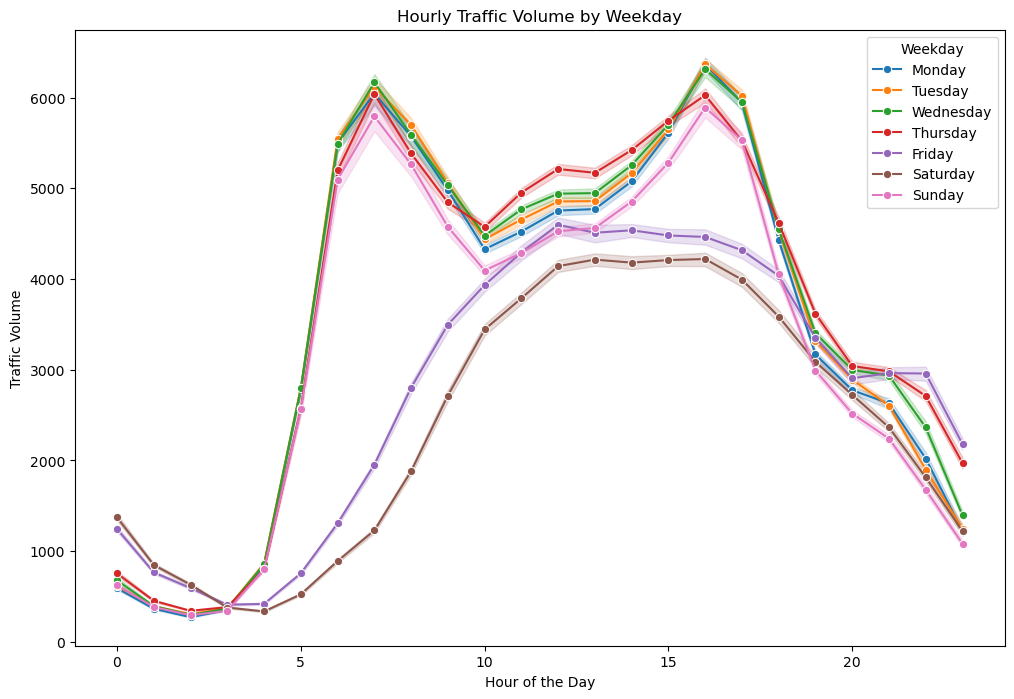

In [47]:
custom_palette = sns.color_palette("husl", 7) 
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday',
                   6: 'Saturday'}

plt.figure(figsize=(12, 8))
for day in df['Weekday'].unique():
    day_name = weekday_mapping[day] 
    day_data = df[df['Weekday'] == day]
    sns.lineplot(data=day_data, x='Hour',y='Traffic_Volume',label=day_name,marker='o',
                 palette=custom_palette) 
    
plt.title('Hourly Traffic Volume by Weekday')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')

plt.legend(title='Weekday')
plt.show()

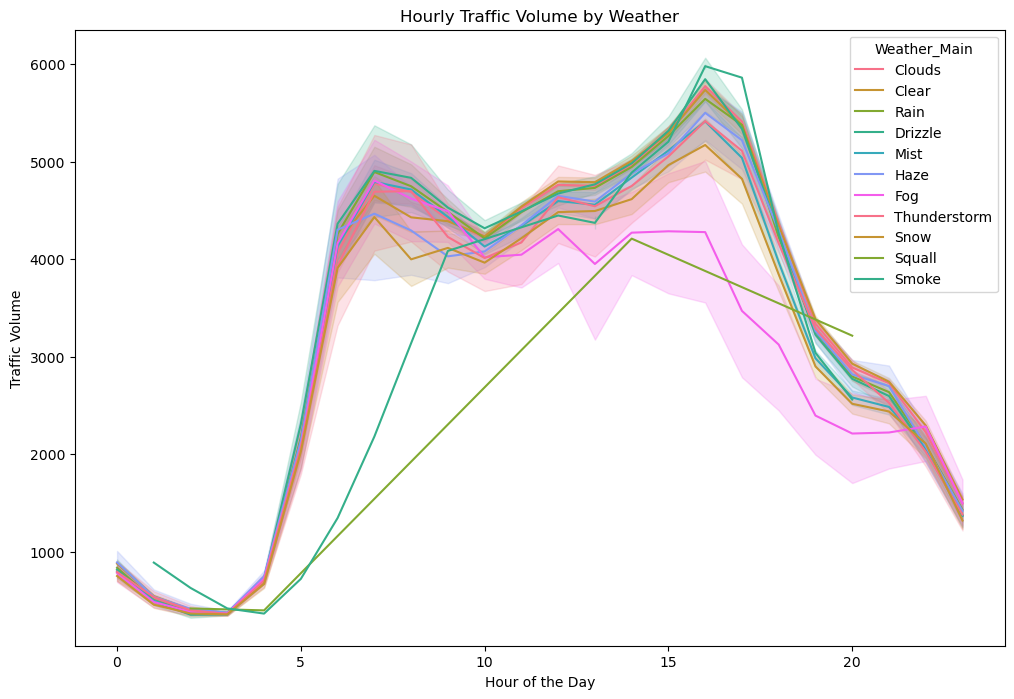

In [48]:
custom_palette = sns.color_palette("husl", 7)
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Hour', y='Traffic_Volume', hue='Weather_Main', palette=custom_palette)
plt.title('Hourly Traffic Volume by Weather')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')

plt.show()

#### 2. Treating Outliers

In [49]:
df.sample(1)

,Date_Time,Holiday,Temp,Rain_1H,Snow_1H,Clouds_All,Weather_Main,Weather_Description,Traffic_Volume,Weekday,Hour,Month,Year
34940,2017-06-29 09:00:00,No,18.55,0,0,90,Rain,Moderate Rain,4784,3,9,6,2017


In [50]:
df.drop(['Date_Time'], axis=1, inplace=True)

In [51]:
def clip_outliers(df):
    for col in df[numerical_features]:
        # Using IQR method to define range of Upper and Lower limit.
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Replace the outliers with Upper and lower Bound
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [52]:
df = clip_outliers(df)

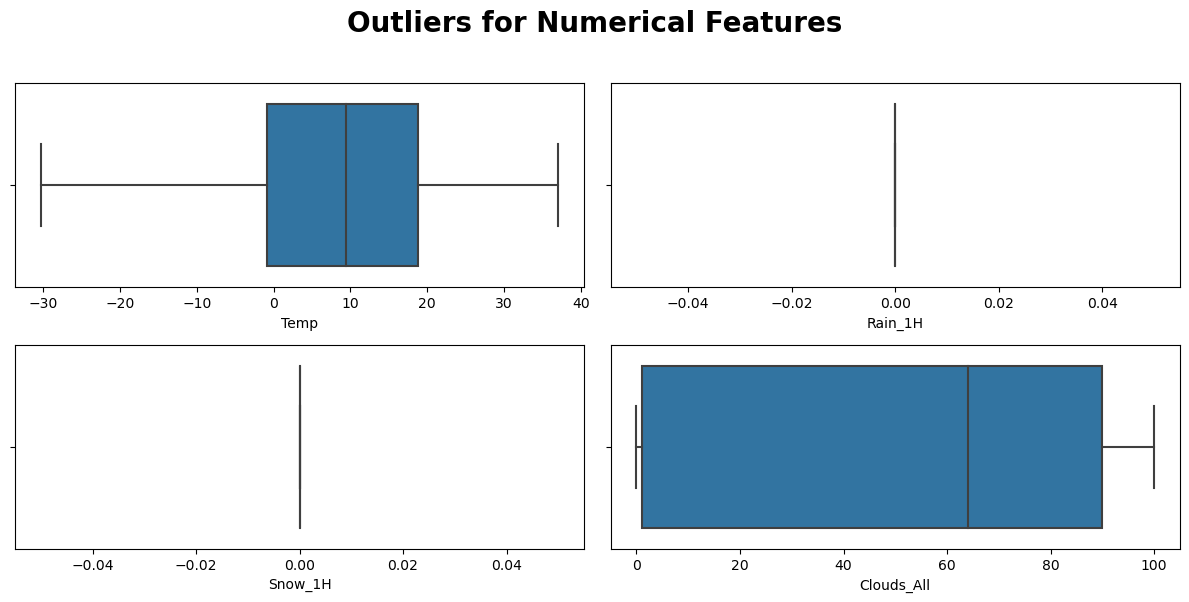

In [53]:
plt.figure(figsize=(12, 8))
plt.suptitle('Outliers for Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

#### 3. Encoding Categorical Values

In [54]:
df.sample(1)

,Holiday,Temp,Rain_1H,Snow_1H,Clouds_All,Weather_Main,Weather_Description,Traffic_Volume,Weekday,Hour,Month,Year
41962,No,1.94,0,0,1,Clear,Sky Is Clear,3709,3,19,3,2018


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()

In [57]:
df['Holiday']= le.fit_transform(df['Holiday'])
df['Weather_Main']= le.fit_transform(df['Weather_Main'])
df['Weather_Description']= le.fit_transform(df['Weather_Description'])

#### 3. Correlation Coefficient

In [58]:
# Find and Remove Correlated Features
def correlation(dataset, threshold):
    col_corr = set()    
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:     
                colname = corr_matrix.columns[i]               
                col_corr.add(colname)
    return col_corr

In [59]:
# Checking the Highly Correlated Features
correlation(df, 0.7) 

set()

#### 4. VIF (Variance Inflation Factor)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF 
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    
    return vif

In [61]:
calc_vif(df[[i for i in df.describe().columns]])

,VIF Factor,features
0,2497.061754,Holiday
1,1.564309,Temp
2,NaN,Rain_1H
3,NaN,Snow_1H
4,4.440991,Clouds_All
5,2.519467,Weather_Main
6,5.528546,Weather_Description
7,4.408573,Traffic_Volume
8,3.305891,Weekday
9,4.289206,Hour


In [62]:
df.drop('Holiday', axis=1, inplace=True)

In [63]:
df.drop('Year', axis=1, inplace=True)

In [64]:
df.sample(1)

,Temp,Rain_1H,Snow_1H,Clouds_All,Weather_Main,Weather_Description,Traffic_Volume,Weekday,Hour,Month
8686,27.35,0,0,8,0,25,628,2,0,8


####  5. Normalization of Target Variable

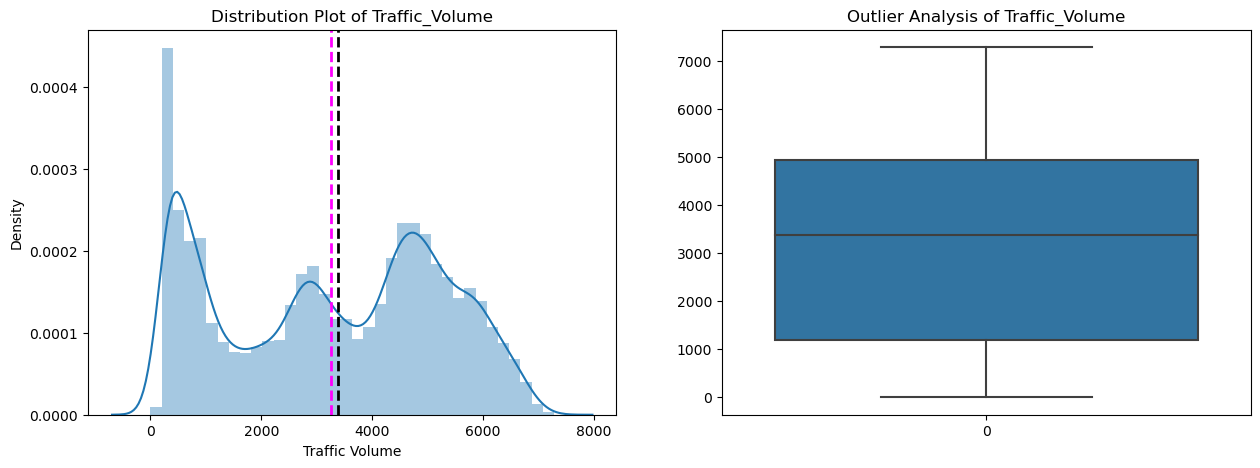

In [65]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

dist =sns.distplot(df['Traffic_Volume'],hist=True, ax = ax[0])
dist.set(xlabel = 'Traffic Volume', ylabel ='Density', title = 'Distribution Plot of Traffic_Volume')

dist.axvline(df['Traffic_Volume'].mean(), color='magenta', linestyle='dashed', linewidth=2)
dist.axvline(df['Traffic_Volume'].median(), color='black', linestyle='dashed', linewidth=2)

# Boxplot
box = sns.boxplot(df.Traffic_Volume, ax= ax[1])
box.set(title = 'Outlier Analysis of Traffic_Volume')
plt.show()

<Axes: xlabel='Traffic_Volume', ylabel='Density'>

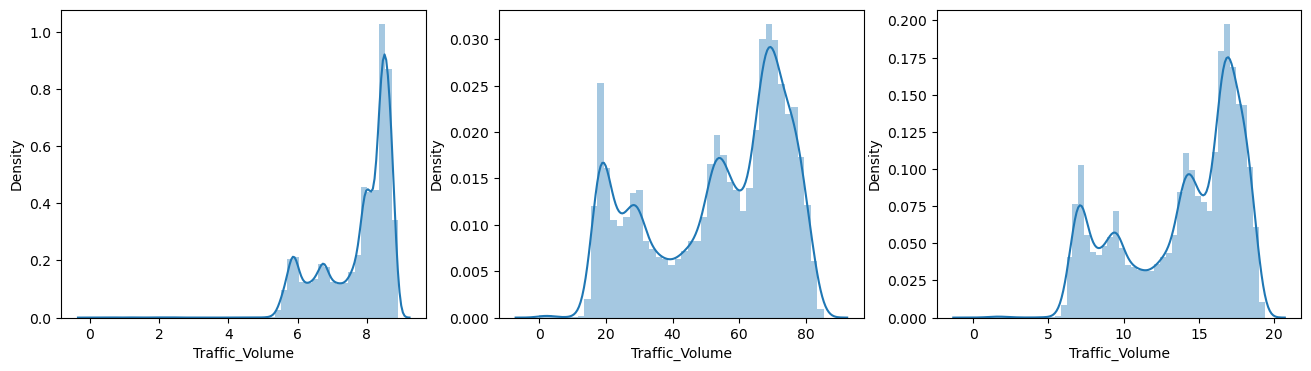

In [66]:
# Transformation for Target Variable
fig, axs = plt.subplots(1,3, figsize=(16,4))

sns.distplot(np.log1p(df['Traffic_Volume']),kde=True, ax=axs[0])
sns.distplot(np.sqrt(df['Traffic_Volume']),kde=True, ax=axs[1])
sns.distplot(np.cbrt(df['Traffic_Volume']),kde=True, ax=axs[2])

In [67]:
df['Traffic_Volume']= np.log1p(df['Traffic_Volume']) # Applying Log Transformation in the Target 

#### Train Test Split

In [68]:
X = df.drop('Traffic_Volume', axis=1)
y= df['Traffic_Volume'] 

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(38549, 9)
(9638, 9)


In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
# Scaling Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
X_train

array([[ 1.11284722,  0.        ,  0.        , ...,  0.00728806,
         1.38026615, -0.15250198],
       [ 0.78196267,  0.        ,  0.        , ..., -0.49084538,
         1.66814941,  0.14176165],
       [-0.34901799,  0.        ,  0.        , ..., -1.48711224,
         0.08479147, -0.4467656 ],
       ...,
       [ 0.44164674,  0.        ,  0.        , ...,  0.50542149,
        -1.49856646,  1.02455253],
       [-0.94476736,  0.        ,  0.        , ...,  1.00355492,
        -0.63491668,  1.31881616],
       [ 1.21816439,  0.        ,  0.        , ...,  1.50168835,
         0.51661637,  0.14176165]])

In [75]:
X_test

array([[-0.96048634,  0.        ,  0.        , ..., -0.98897881,
         0.22873311,  1.31881616],
       [ 0.9234335 ,  0.        ,  0.        , ...,  1.00355492,
         0.94844126,  1.02455253],
       [-0.63746129,  0.        ,  0.        , ...,  0.00728806,
         0.22873311, -1.03529286],
       ...,
       [-0.82608906,  0.        ,  0.        , ...,  1.00355492,
         0.51661637, -1.32955649],
       [-0.55886638,  0.        ,  0.        , ...,  1.00355492,
        -0.63491668, -0.74102923],
       [-0.00870206,  0.        ,  0.        , ..., -0.49084538,
        -0.77885831,  1.02455253]])

## Model Building

In [76]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [77]:
# List for Appending Performance Metric Score
model_result = []

def predict(ml_model, model_name):
    # Fit the Model
    model = ml_model.fit(X_train, y_train)

    # Predicting Values
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    '''Evaluation Metrics on Train Data'''
    print('''Evaluation Metrics on Train Data''')
    train_MSE = round(mean_squared_error(y_train, y_train_pred), 3)
    train_RMSE = round(np.sqrt(train_MSE), 3)
    train_r2 = round(r2_score(y_train, y_train_pred), 3)

    print(f'train MSE : {train_MSE}')
    print(f'train RMSE : {train_RMSE}')
    print(f'train R2 : {train_r2}')

    '''Evaluation Metrics on Test Data'''
    print('''Evaluation Metrics on Test Data''')
    test_MSE = round(mean_squared_error(y_test, y_test_pred), 3)
    test_RMSE = round(np.sqrt(test_MSE), 3)
    test_r2 = round(r2_score(y_test, y_test_pred), 3)
    print(f'test MSE : {test_MSE}')
    print(f'test RMSE : {test_RMSE}')
    print(f'test R2 : {test_r2}')
    print('-'*100)

    # Graph --> Actual vs Predicted on Test Data
    plt.figure(figsize=(6, 5))
    plt.plot((y_test_pred)[:20])
    plt.plot(np.array((y_test)[:20]))
    plt.legend(["Predicted", "Actual"])
    plt.title('Actual vs Predicted Test Data')
    plt.xlabel('Test Data on Last 20 Points')
    plt.show()
    print('-'*100)

    '''Actual vs Predicted Value on Test Data'''
    d = {'y_actual': y_test, 'y_predict': y_test_pred, 'error': y_test-y_test_pred}
    print(pd.DataFrame(data=d).head().T)

    # Append results to model_result list
    model_result.append({'model': model_name,
                         'train MSE': train_MSE,
                         'train RMSE': train_RMSE,
                         'train R2': train_r2,
                         'test RMSE': test_RMSE,
                         'test R2': test_r2})

#### 1. Linear Regression

Evaluation Metrics on Train Data
train MSE : 0.699
train RMSE : 0.836
train R2 : 0.266
Evaluation Metrics on Test Data
test MSE : 0.691
test RMSE : 0.831
test R2 : 0.279
----------------------------------------------------------------------------------------------------


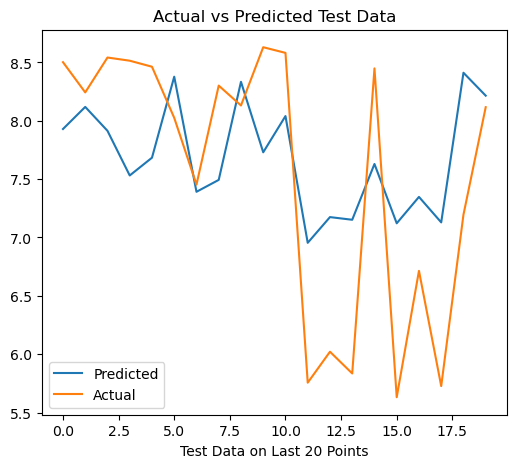

----------------------------------------------------------------------------------------------------
              1162      27027     21596     25842     17240
y_actual   8.502080  8.243019  8.541886  8.514590  8.462948
y_predict  7.929337  8.118741  7.913909  7.531266  7.683535
error      0.572742  0.124278  0.627977  0.983324  0.779413


In [78]:
predict(LinearRegression(), 'LinearRegression')

#### 2. Lasso Regression

Evaluation Metrics on Train Data
train MSE : 0.724
train RMSE : 0.851
train R2 : 0.239
Evaluation Metrics on Test Data
test MSE : 0.719
test RMSE : 0.848
test R2 : 0.249
----------------------------------------------------------------------------------------------------


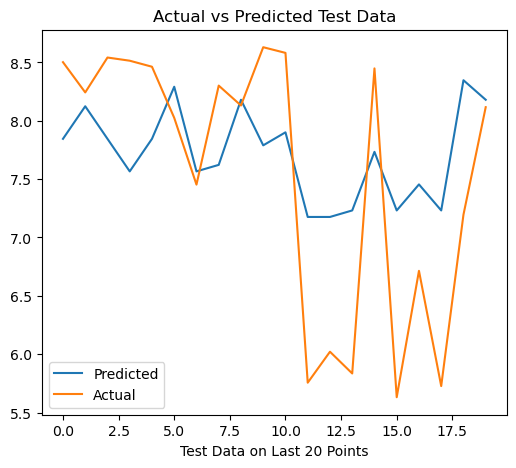

----------------------------------------------------------------------------------------------------
              1162      27027     21596     25842     17240
y_actual   8.502080  8.243019  8.541886  8.514590  8.462948
y_predict  7.845236  8.124168  7.845236  7.566304  7.845236
error      0.656844  0.118852  0.696650  0.948286  0.617712


In [79]:
predict(Lasso(alpha=0.1, max_iter=1000), 'Lasso')

#### 3. Ridge Regression

Evaluation Metrics on Train Data
train MSE : 0.699
train RMSE : 0.836
train R2 : 0.266
Evaluation Metrics on Test Data
test MSE : 0.691
test RMSE : 0.831
test R2 : 0.279
----------------------------------------------------------------------------------------------------


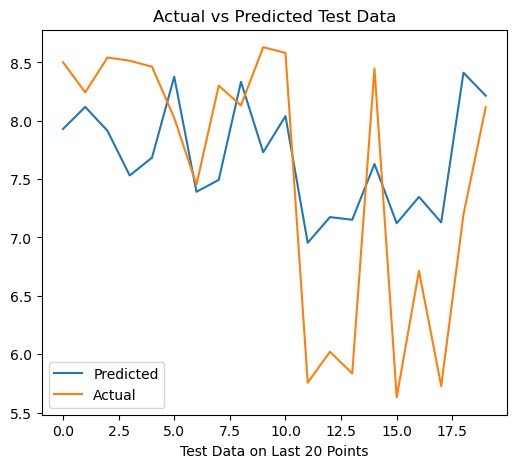

----------------------------------------------------------------------------------------------------
              1162      27027     21596     25842     17240
y_actual   8.502080  8.243019  8.541886  8.514590  8.462948
y_predict  7.929337  8.118740  7.913909  7.531267  7.683536
error      0.572743  0.124279  0.627977  0.983323  0.779413


In [80]:
predict(Ridge(alpha=0.1, max_iter=1000), 'Ridge')

#### 4. Elastic Net

Evaluation Metrics on Train Data
train MSE : 0.713
train RMSE : 0.844
train R2 : 0.25
Evaluation Metrics on Test Data
test MSE : 0.708
test RMSE : 0.841
test R2 : 0.261
----------------------------------------------------------------------------------------------------


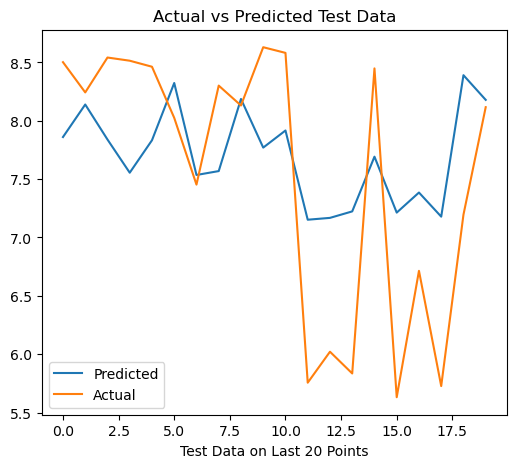

----------------------------------------------------------------------------------------------------
              1162      27027     21596     25842     17240
y_actual   8.502080  8.243019  8.541886  8.514590  8.462948
y_predict  7.860622  8.139305  7.839330  7.554973  7.833007
error      0.641457  0.103715  0.702556  0.959617  0.629942


In [81]:
predict(ElasticNet(alpha=0.1, max_iter=1000), 'Elastic Net')

#### 5. Decision Tree

Evaluation Metrics on Train Data
train MSE : 0.064
train RMSE : 0.253
train R2 : 0.933
Evaluation Metrics on Test Data
test MSE : 0.061
test RMSE : 0.247
test R2 : 0.937
----------------------------------------------------------------------------------------------------


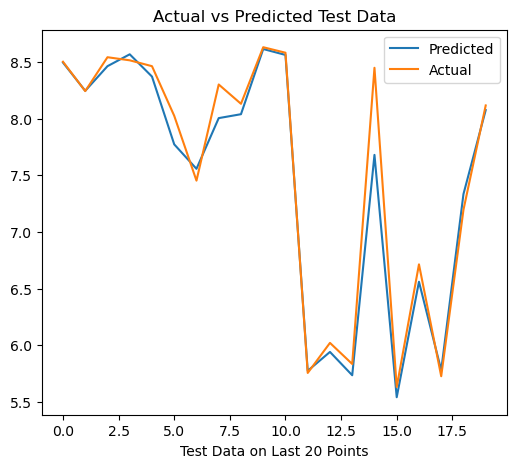

----------------------------------------------------------------------------------------------------
              1162      27027     21596     25842     17240
y_actual   8.502080  8.243019  8.541886  8.514590  8.462948
y_predict  8.494808  8.245459  8.462916  8.567629  8.371275
error      0.007272 -0.002440  0.078970 -0.053039  0.091673


In [82]:
predict(DecisionTreeRegressor(min_samples_leaf=20, min_samples_split=3,max_depth=20, random_state=33), 'Decision Tree')

#### 6. Random Forest

In [83]:
param_grid = {'n_estimators': [30,50],
             'max_depth': [10,15],      
             'min_samples_split': [5,10],
             'min_samples_leaf': [1,3]}  

rf = RandomForestRegressor()

# Use GridSearchCV to Perform a Grid Search over the Parameter Grid
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='r2')

# Fit the Model to the Training Data
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 50]},
             scoring='r2')

In [84]:
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=30)

Evaluation Metrics on Train Data
train MSE : 0.057
train RMSE : 0.239
train R2 : 0.94
Evaluation Metrics on Test Data
test MSE : 0.059
test RMSE : 0.243
test R2 : 0.938
----------------------------------------------------------------------------------------------------


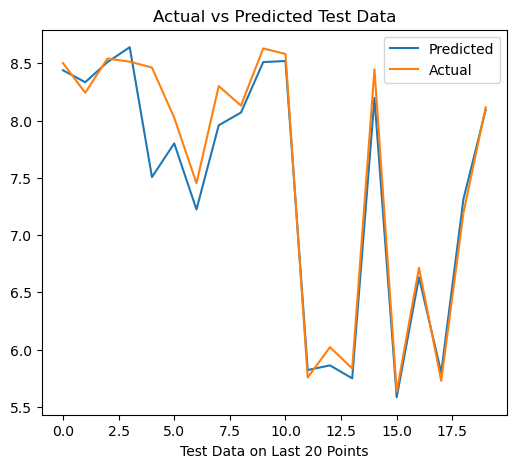

----------------------------------------------------------------------------------------------------
              1162      27027     21596    25842     17240
y_actual   8.502080  8.243019  8.541886  8.51459  8.462948
y_predict  8.439552  8.335112  8.510820  8.64080  7.506444
error      0.062527 -0.092093  0.031066 -0.12621  0.956505


In [85]:
predict(rf_optimal_model, 'Random Forest')

#### Model Explainability

In [86]:
# Feature Importance 
importances = rf_optimal_model.feature_importances_

# Creating a Dictonary 
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the Dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
7,Hour,0.902625
6,Weekday,0.070595
0,Temp,0.018508
8,Month,0.003259
5,Weather_Description,0.002338
3,Clouds_All,0.001406
4,Weather_Main,0.001269
1,Rain_1H,0.000000
2,Snow_1H,0.000000


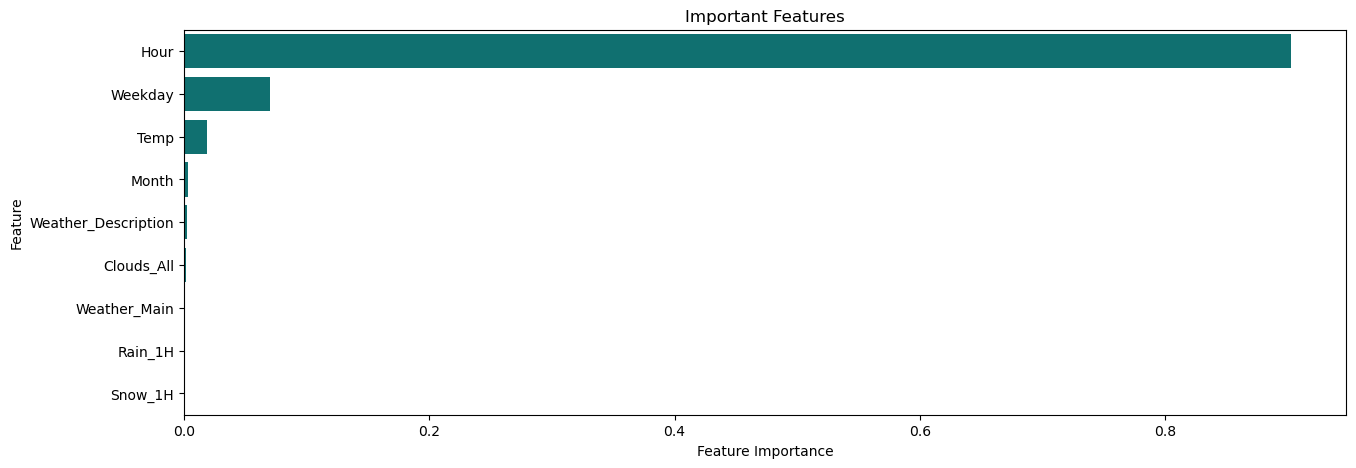

In [87]:
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='teal')
bar.set_title('Important Features')
plt.show()

#### 7. Xtreme Gradient Boosting

#### HyperParameter Tunning using GridSearchCV

In [88]:
param_grid = {'n_estimators': [100,300],     
             'max_depth': [5,7],            
             'min_samples_leaf': [1,3]}     

# Initialize the RandomForestRegressor Model
xgb = XGBRegressor()

# Use GridSearchCV to perform a Grid Search over the Parameter Grid
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='r2')

# Fit the Model to the Training Data
grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...ne,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [5, 7], 'min_samples_leaf': [1, 3],
                         'n_estimators': [100, 300]},
             scoring='r2')

In [89]:
xgb_optimal_model = grid_search.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, min_samples_leaf=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation Metrics on Train Data
train MSE : 0.047
train RMSE : 0.217
train R2 : 0.951
Evaluation Metrics on Test Data
test MSE : 0.054
test RMSE : 0.232
test R2 : 0.944
----------------------------------------------------------------------------------------------------


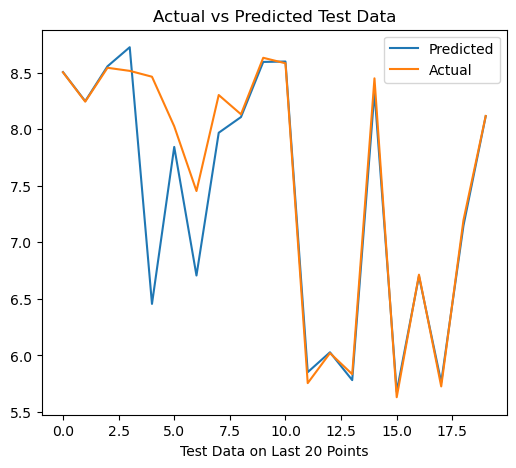

----------------------------------------------------------------------------------------------------
              1162      27027     21596     25842     17240
y_actual   8.502080  8.243019  8.541886  8.514590  8.462948
y_predict  8.503819  8.247003  8.554855  8.723563  6.455697
error     -0.001739 -0.003983 -0.012970 -0.208973  2.007252


In [90]:
predict(xgb_optimal_model, 'XGB')

#### Model Explainability

In [91]:
# Feature Importance 
importances = xgb_optimal_model.feature_importances_

# Creating a Dictonary 
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

# Creating the Dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
7,Hour,0.872145
6,Weekday,0.088078
0,Temp,0.009253
4,Weather_Main,0.008866
8,Month,0.008621
3,Clouds_All,0.007101
5,Weather_Description,0.005935
1,Rain_1H,0.000000
2,Snow_1H,0.000000


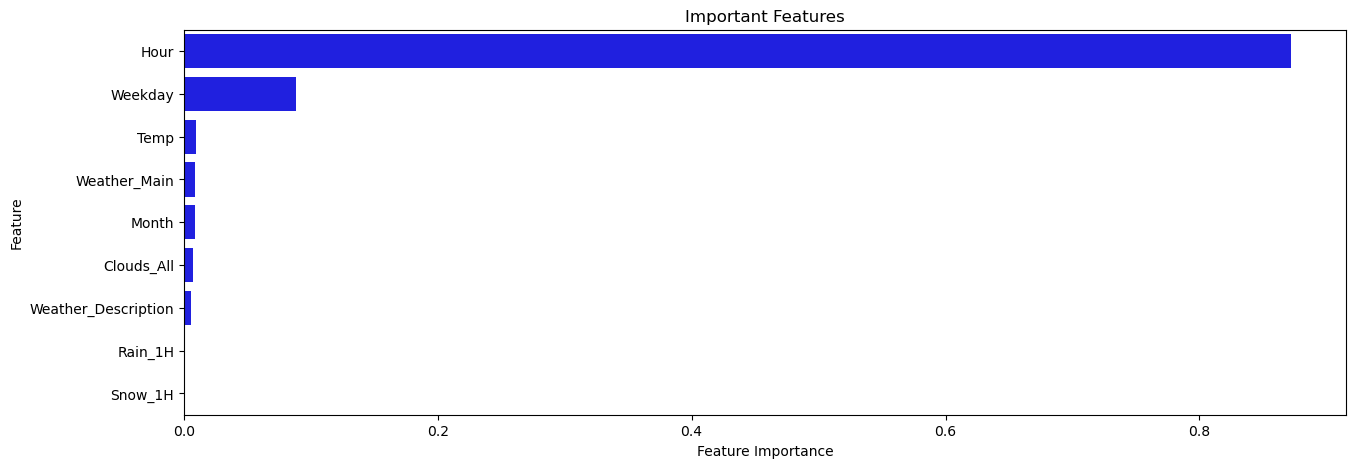

In [92]:
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()

### Model Result

In [93]:
model_result = pd.DataFrame(model_result)
# Sorting the Values by Test R2 score
model_result.sort_values(by='test R2', ascending=False)

,model,train MSE,train RMSE,train R2,test RMSE,test R2
6,XGB,0.047,0.217,0.951,0.232,0.944
5,Random Forest,0.057,0.239,0.940,0.243,0.938
4,Decision Tree,0.064,0.253,0.933,0.247,0.937
0,LinearRegression,0.699,0.836,0.266,0.831,0.279
2,Ridge,0.699,0.836,0.266,0.831,0.279
3,Elastic Net,0.713,0.844,0.250,0.841,0.261
1,Lasso,0.724,0.851,0.239,0.848,0.249


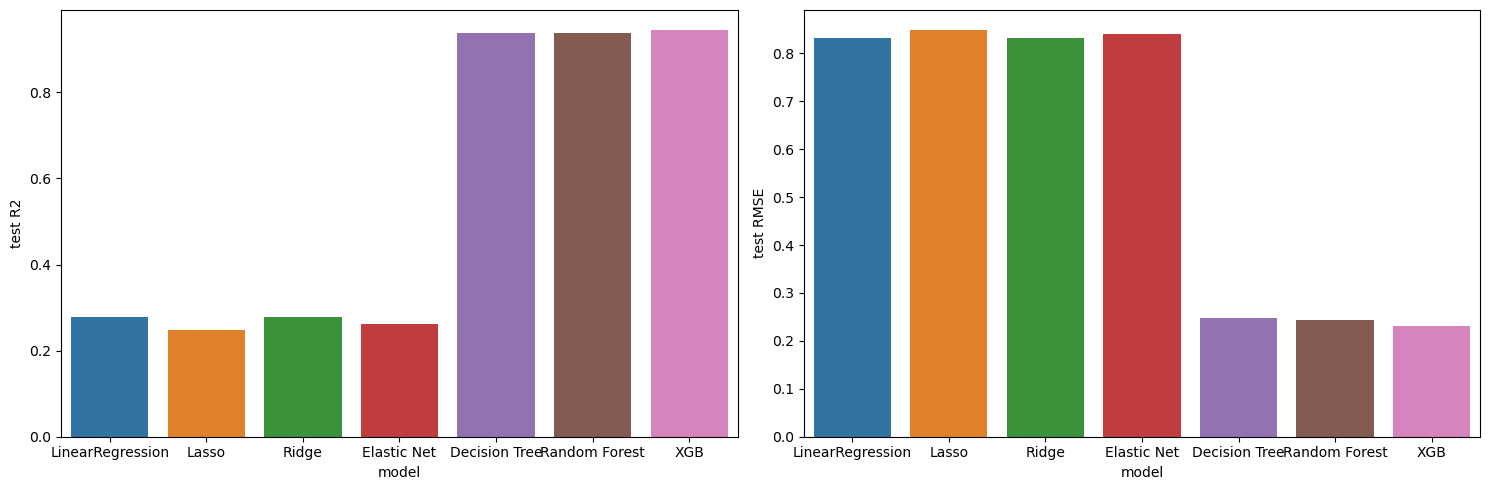

In [94]:
# Plotting Graph to Compare Model Performance
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test R2'], ax=ax[0])           
sns.barplot(x=model_result['model'], y=model_result['test RMSE'], ax=ax[1])
plt.tight_layout()

### Save the Model

In [95]:
df.drop(['Weather_Main', 'Month', 'Clouds_All','Weather_Description','Rain_1H','Snow_1H'], axis=1, inplace=True)

In [96]:
X = df.drop('Traffic_Volume', axis=1)
y= df['Traffic_Volume'] 

In [97]:
X = scaler.fit_transform(X)

In [98]:
xgb_model = xgb_optimal_model.fit(X, y)

In [99]:
import pickle
with open('Traffic_XGB_Model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [100]:
with open("Scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)